SMB、HML两个指标的计算方式如下：
1. 首先，按市值大小平均分为两组(Small 组, Big 组)，基准是这一时间的市场上公司市值中位数;
2. 按 BM 从小到大分三组,即前 30%(Growth 组),中间 40%(Neutral 组),后 30%(Value 组)；
3. 每个组的月回报以组内所有成员股票当月回报的加权平均数为依据,计算每个月的 SMB 和 HML 值。具体计算公式如下: 
   SMB = Small size return - Big size return)
   HML = Value company return - Growth company return
4. 以市场回报减去无风险回报,即得到超额市场回报(Rm-Rf)。（由于Ricequant平台无法提取国债收益率，我只能对这个时段的所有IBO1M求平均值作为无风    险回报率

In [161]:
# %pdb

Automatic pdb calling has been turned OFF


In [2]:
# %load fama.py
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta


In [3]:
research_starttime='2010-04-01'
research_endtime='2018-04-01'
format='%Y-%m-%d %H:%M:%S'
data_type=""#"net"
data_mode="fast"#"fast"

### 定义基础数据获取函数

In [4]:
## 从网络获取数据
def get_dp():
        interval_month=24
        # date_range=pd.date_range(research_starttime,research_endtime)
        # len(date_range)/31
        # pd.to_datetime(research_endtime)-(pd.to_datetime(research_endtime)-pd.to_datetime(research_starttime))/4
        # print(datetime.date.today() +relativedelta(months=-1))
        step0=pd.to_datetime(research_endtime)
        step1=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*1)
        step2=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*2)
        step3=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*3)
        step4=pd.to_datetime(research_endtime)-relativedelta(months=interval_month*4)
        
        #网络请求API
        def get_years_fundamentals(interval_month,enddate):
            return get_fundamentals(
                query(fundamentals.eod_derivative_indicator.market_cap,fundamentals.financial_indicator.book_value_per_share)
                ,enddate, str(interval_month)+'m')
        
        # arr data
        dp_arr = [get_years_fundamentals(interval_month,step0),
                  get_years_fundamentals(interval_month,step1),
                  get_years_fundamentals(interval_month,step2),
                  get_years_fundamentals(interval_month,step3)]
        dp_arr
        
        # merge data 
        dp_merge=pd.concat(dp_arr,axis=1)#,ignore_index=True
        return dp_merge
        
#转换索引
def trans_index(df):
    if(type(df.index[0])==str):
        df.index=pd.to_datetime(df.index)
    return df
        
#get_all_instruments
def all_instruments_cs():
    df_market=None
    if(data_type=="net"):
        df_market = all_instruments(type='CS')
    else:
        df_market=pd.read_csv("all_instruments.csv",index_col=0)
    return df_market

#get_price_cs
def get_price_cs(data_starttime,data_endtime):
    df_price_data=None
    df_market=all_instruments_cs()
    if(data_type=="net"):
        df_price_data = get_price(list(df_market['order_book_id']),start_date=data_starttime, end_date=data_endtime,frequency='1d',fields='close')
    else:
        df_price_data=pd.read_csv("price_data.csv",index_col=0)
        df_price_data=trans_index(df_price_data)
    return df_price_data

#转换Series
def trans_series(df,key=1):
    if(type(df)==pd.DataFrame):
        df=df[key]
    return df


In [5]:
df_book_value=None
df_market_cap=None

#网络获取方式
if(data_type=="net"):
    dp_merge=get_dp()
    df_book_value=dp_merge["book_value_per_share"]
    df_market_cap=dp_merge["market_cap"]
else:
#本地获取方式
    df_book_value=pd.read_csv("./book_value_per_share.csv",index_col=0)
    df_market_cap=pd.read_csv("./market_cap.csv",index_col=0)
    df_book_value=trans_index(df_book_value)
    df_market_cap=trans_index(df_market_cap)

In [6]:
df_book_value

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,11.77,12.0200,1.3740,1.1962,4.1242,1.0991,2.2153,2.1635,2.7179,4.9023,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7665,4.7320,2.6177,2.3195,2.8958
2018-02-28,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2018-01-26,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2017-12-26,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2017-11-24,11.54,10.5418,1.3740,1.1962,3.7787,1.0991,2.2153,2.1635,2.7179,4.8304,...,3.7975,8.2268,5.8856,5.0689,5.9552,1.7259,4.7320,2.6177,2.3195,2.8958
2017-10-24,11.54,10.2000,1.3938,1.1948,3.7124,1.1300,2.1955,2.1101,2.6469,4.4732,...,3.6819,8.1476,5.6548,4.8764,5.9552,1.1078,4.5464,2.4926,2.2511,5.7284
2017-09-22,11.15,10.2000,1.3938,1.1948,3.7124,1.1300,2.1955,2.1101,2.6469,4.4732,...,3.6819,8.1476,5.6548,4.8764,5.8603,1.1078,4.5464,2.4926,2.2511,5.7284
2017-08-22,11.15,10.3242,1.4247,1.2020,3.7124,1.6052,2.1838,2.1071,2.6713,4.5512,...,5.5301,8.1874,5.6548,4.8764,5.8603,1.1448,4.5464,3.8168,2.1853,5.7564
2017-07-21,10.94,10.3242,1.4247,1.2020,3.7844,1.6052,2.1838,2.1071,2.6713,4.5512,...,5.5301,8.1874,6.1934,4.8975,5.7729,1.1448,4.6558,3.8168,2.1853,5.7564
2017-06-21,10.94,10.3242,1.4247,1.2020,3.7844,1.6052,2.1838,2.1071,2.6713,4.5512,...,5.5301,8.1874,6.1934,4.8975,5.7729,1.1448,4.6558,3.8168,2.1853,5.7564


In [7]:
df_market_cap

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,1.871575e+11,3.674934e+11,1.918867e+09,4.085952e+09,9.949463e+09,4.964600e+09,1.927738e+10,1.304652e+10,3.697545e+09,9.535665e+09,...,3.788374e+09,3.847200e+09,1.180500e+10,3.183495e+09,1.881263e+09,1.831616e+11,5.078538e+09,8.092657e+09,4.063731e+09,4.233600e+09
2018-02-28,2.069035e+11,3.609803e+11,1.729920e+09,4.043611e+09,1.329745e+10,5.771824e+09,2.130657e+10,1.298204e+10,3.648353e+09,9.243636e+09,...,3.545489e+09,3.312000e+09,1.121400e+10,2.786974e+09,1.697907e+09,1.853215e+11,5.036517e+09,6.861859e+09,4.063731e+09,4.124160e+09
2018-01-26,2.412443e+11,4.420076e+11,1.817255e+09,4.477611e+09,1.329745e+10,5.771824e+09,2.342032e+10,1.457256e+10,4.427215e+09,1.067995e+10,...,3.841998e+09,4.903200e+09,1.112400e+10,2.913214e+09,2.059402e+09,1.680421e+11,5.315656e+09,7.207200e+09,4.835107e+09,4.775040e+09
2017-12-26,2.345478e+11,3.366941e+11,1.884437e+09,4.340001e+09,1.329745e+10,5.771824e+09,2.466039e+10,1.545379e+10,4.517399e+09,9.988610e+09,...,3.769448e+09,5.834400e+09,1.151100e+10,2.821771e+09,2.057911e+09,1.386671e+11,5.642820e+09,7.219800e+09,4.835107e+09,4.285440e+09
2017-11-24,2.500012e+11,3.510450e+11,2.305160e+09,4.456440e+09,1.329745e+10,5.771824e+09,2.415309e+10,1.637801e+10,4.435414e+09,9.899213e+09,...,3.980790e+09,6.168000e+09,1.208100e+10,2.822580e+09,2.373194e+09,1.447149e+11,5.390694e+09,7.333200e+09,5.115216e+09,4.550400e+09
2017-10-24,1.955710e+11,2.980571e+11,2.099417e+09,5.165660e+09,1.329745e+10,5.771824e+09,2.502677e+10,1.820495e+10,5.673395e+09,1.146068e+10,...,5.207832e+09,5.517600e+09,1.116300e+10,3.070458e+09,2.556550e+09,1.559465e+11,5.048523e+09,8.164800e+09,6.136535e+09,5.690880e+09
2017-09-22,1.964295e+11,3.069988e+11,2.038114e+09,5.419709e+09,1.329745e+10,5.373409e+09,2.555486e+10,1.960203e+10,4.132068e+09,1.185402e+10,...,4.763068e+09,5.656800e+09,1.114800e+10,3.230698e+09,2.653446e+09,1.641542e+11,4.970484e+09,8.064000e+09,6.541616e+09,6.076800e+09
2017-08-22,1.828649e+11,2.562187e+11,1.925585e+09,5.112733e+09,1.124546e+10,5.543169e+09,2.277472e+10,1.824794e+10,4.009090e+09,1.141300e+10,...,4.712599e+09,5.752800e+09,1.075500e+10,2.834953e+09,2.573693e+09,1.440669e+11,5.009504e+09,7.641900e+09,5.584937e+09,5.765760e+09
2017-07-21,1.869858e+11,2.735502e+11,1.805499e+09,5.197416e+09,1.143446e+10,5.560491e+09,2.159526e+10,1.799002e+10,3.935303e+09,1.163947e+10,...,4.365620e+09,5.008800e+09,1.138500e+10,2.834953e+09,2.584874e+09,1.242898e+11,4.616307e+09,6.696900e+09,5.451346e+09,5.627520e+09
2017-06-21,1.571093e+11,2.322638e+11,2.231260e+09,5.694928e+09,1.182596e+10,5.499285e+09,2.070291e+10,1.689385e+10,4.287840e+09,1.255728e+10,...,5.084812e+09,5.169600e+09,1.172400e+10,3.298678e+09,3.196806e+09,8.409825e+10,5.066532e+09,9.185400e+09,6.174676e+09,6.246720e+09


计算说明：
dp_merge.major_xs("2018-03-30")


In [8]:
df_book_value=df_book_value.dropna(axis=1,how="all")
df_market_cap=df_market_cap.dropna(axis=1,how="all")
index_date = df_book_value.index
print("index_date",index_date)
stocks = df_book_value.columns

data_endtime=index_date[0]
data_count=len(index_date)
data_starttime=index_date[data_count-1]


index_date DatetimeIndex(['2018-03-30', '2018-02-28', '2018-01-26', '2017-12-26',
               '2017-11-24', '2017-10-24', '2017-09-22', '2017-08-22',
               '2017-07-21', '2017-06-21', '2017-05-19', '2017-04-19',
               '2017-03-17', '2017-02-17', '2017-01-17', '2016-12-16',
               '2016-11-16', '2016-10-14', '2016-09-14', '2016-08-12',
               '2016-07-12', '2016-06-08', '2016-05-06', '2016-04-06',
               '2016-04-01', '2016-03-01', '2016-02-01', '2015-12-31',
               '2015-11-30', '2015-10-30', '2015-09-30', '2015-08-28',
               '2015-07-28', '2015-06-26', '2015-05-26', '2015-04-24',
               '2015-03-24', '2015-02-17', '2015-01-16', '2014-12-16',
               '2014-11-14', '2014-10-14', '2014-09-12', '2014-08-12',
               '2014-07-11', '2014-06-11', '2014-05-09', '2014-04-09',
               '2014-04-01', '2014-02-28', '2014-01-28', '2013-12-27',
               '2013-11-27', '2013-10-25', '2013-09-25', '2013-08-

In [9]:
# index_date

In [10]:
#all_instruments_cs
df_market = all_instruments_cs()
print("df_market['order_book_id']=",len(df_market['order_book_id']),df_market['order_book_id']);

df_market['order_book_id']= 3631 0       002322.XSHE
1       601877.XSHG
2       002480.XSHE
3       002735.XSHE
4       000839.XSHE
5       603966.XSHG
6       300521.XSHE
7       002202.XSHE
8       300160.XSHE
9       002025.XSHE
10      002011.XSHE
11      600261.XSHG
12      000759.XSHE
13      603421.XSHG
14      600635.XSHG
15      300151.XSHE
16      000776.XSHE
17      002702.XSHE
18      000968.XSHE
19      002013.XSHE
20      000756.XSHE
21      600672.XSHG
22      300095.XSHE
23      300553.XSHE
24      002718.XSHE
25      603089.XSHG
26      002205.XSHE
27      000951.XSHE
28      300302.XSHE
29      300515.XSHE
           ...     
3601    002490.XSHE
3602    603685.XSHG
3603    002156.XSHE
3604    600966.XSHG
3605    600606.XSHG
3606    002453.XSHE
3607    300255.XSHE
3608    603458.XSHG
3609    300379.XSHE
3610    000875.XSHE
3611    000667.XSHE
3612    600583.XSHG
3613    300223.XSHE
3614    002569.XSHE
3615    300359.XSHE
3616    300050.XSHE
3617    002157.XSHE
3618   

In [11]:
df_price_data = get_price_cs(data_starttime,data_endtime)

In [12]:
#save data to reuse offline
# df_book_value.to_csv("book_value_per_share.csv")
# df_market_cap.to_csv("market_cap.csv")
# df_market.to_csv("all_instruments.csv")
# df_price_data.to_csv("price_data.csv")

In [13]:
# df_price_data.dropna(axis=1,how="all")

In [14]:
df_book_value1=df_book_value.copy()
df_market_cap1=df_market_cap.copy()
df_price_data1=df_price_data.copy()

df_price_data=df_price_data.dropna(axis=1,how="all")#3531
df_price_data=df_price_data[stocks]#3513
# df_market_cap=df_market_cap[stocks]#3513
df_price_data
df_book_value=df_book_value.fillna(0)
df_market_cap=df_market_cap.fillna(0)
df_price_data=df_price_data.fillna(0)
# df_book_value1.dropna()
# df_book_value=df_book_value.fillna(0)
# df_price_data2=df_price_data[stocks]#3513


In [81]:
#btm 函数定义
def get_btm(index_date,stocks,df_book_value,df_price_data):
    btm = pd.DataFrame(index=index_date,columns=stocks)
    if(data_mode=="fast"):
        btm=pd.read_csv("btm2.csv",index_col=0)
    else:
        #实时计算，耗时很长
        i=0
        for stk in stocks:
            for date in index_date:
                i=i+1
                if i==1:
                    print("type(stk)=",type(stk),stk,"type(date)=",type(date),date)
                else:
                    pass
        #         dt=date.strftime(format)    
        #         print("dt",type(dt),dt)
                is_valid=False
                if(type(date)==str):
                    is_valid=hasattr(df_price_data[stk],date)
                else:
                    is_valid=hasattr(df_price_data[stk],str(data_endtime))

                if is_valid:
                    if df_price_data[stk][date]!=0:
                        btm[stk][date] = df_book_value[stk][date]/df_price_data[stk][date]
                    else:
                        btm[stk][date] = np.nan
                else:
        #             print('hasattr error',stk,date,type(date))
                    btm[stk][date]=np.nan
    btm=trans_index(btm)
    return btm        


In [193]:
# btm.to_csv("btm2.csv")
btm=get_btm(index_date,stocks,df_book_value,df_price_data)
btm

# df_book_value1.dropna(axis=0,thresh=3513-100)#5 rows × 3513 columns
# btm=get_btm(index_date,stocks,df_book_value1,df_price_data)
# btm
#0.5 96 line
#0.6 85 line
#0.7 67 line
#0.8 25 line
#0.9 12 line
def get_stocks_filter(btm):
    if(data_mode=="fast"):
        stocks_filter=['000001.XSHE', '000002.XSHE', '000004.XSHE', '000005.XSHE', '000006.XSHE', '000007.XSHE', '000008.XSHE', '000009.XSHE', '000010.XSHE', '000011.XSHE', '000012.XSHE', '000014.XSHE', '000016.XSHE', '000017.XSHE', '000018.XSHE', '000019.XSHE', '000020.XSHE', '000021.XSHE', '000022.XSHE', '000023.XSHE', '000024.XSHE', '000025.XSHE', '000026.XSHE', '000027.XSHE', '000028.XSHE', '000029.XSHE', '000030.XSHE', '000031.XSHE', '000032.XSHE', '000033.XSHE', '000034.XSHE', '000035.XSHE', '000036.XSHE', '000037.XSHE', '000038.XSHE', '000039.XSHE', '000040.XSHE', '000042.XSHE', '000043.XSHE', '000045.XSHE', '000046.XSHE', '000048.XSHE', '000049.XSHE', '000050.XSHE', '000055.XSHE', '000056.XSHE', '000058.XSHE', '000059.XSHE', '000060.XSHE', '000061.XSHE', '000062.XSHE', '000063.XSHE', '000065.XSHE', '000066.XSHE', '000068.XSHE', '000069.XSHE', '000070.XSHE', '000078.XSHE', '000088.XSHE', '000089.XSHE', '000090.XSHE', '000096.XSHE', '000099.XSHE', '000100.XSHE', '000150.XSHE', '000151.XSHE', '000153.XSHE', '000155.XSHE', '000156.XSHE', '000157.XSHE', '000158.XSHE', '000159.XSHE', '000301.XSHE', '000338.XSHE', '000400.XSHE', '000401.XSHE', '000402.XSHE', '000403.XSHE', '000404.XSHE', '000407.XSHE', '000408.XSHE', '000409.XSHE', '000410.XSHE', '000411.XSHE', '000413.XSHE', '000415.XSHE', '000416.XSHE', '000417.XSHE', '000418.XSHE', '000419.XSHE', '000420.XSHE', '000421.XSHE', '000422.XSHE', '000423.XSHE', '000425.XSHE', '000426.XSHE', '000428.XSHE', '000429.XSHE', '000430.XSHE', '000488.XSHE', '000498.XSHE', '000501.XSHE', '000502.XSHE', '000503.XSHE', '000504.XSHE', '000505.XSHE', '000506.XSHE', '000507.XSHE', '000509.XSHE', '000510.XSHE', '000511.XSHE', '000513.XSHE', '000514.XSHE', '000516.XSHE', '000517.XSHE', '000518.XSHE', '000519.XSHE', '000520.XSHE', '000521.XSHE', '000522.XSHE', '000523.XSHE', '000524.XSHE', '000525.XSHE', '000526.XSHE', '000527.XSHE', '000528.XSHE', '000529.XSHE', '000530.XSHE', '000531.XSHE', '000532.XSHE', '000533.XSHE', '000534.XSHE', '000536.XSHE', '000537.XSHE', '000538.XSHE', '000539.XSHE', '000540.XSHE', '000541.XSHE', '000543.XSHE', '000544.XSHE', '000545.XSHE', '000546.XSHE', '000547.XSHE', '000548.XSHE', '000550.XSHE', '000551.XSHE', '000552.XSHE', '000553.XSHE', '000554.XSHE', '000555.XSHE', '000557.XSHE', '000558.XSHE', '000559.XSHE', '000560.XSHE', '000561.XSHE', '000562.XSHE', '000563.XSHE', '000564.XSHE', '000565.XSHE', '000566.XSHE', '000567.XSHE', '000568.XSHE', '000570.XSHE', '000571.XSHE', '000572.XSHE', '000573.XSHE', '000576.XSHE', '000578.XSHE', '000581.XSHE', '000582.XSHE', '000584.XSHE', '000585.XSHE', '000586.XSHE', '000587.XSHE', '000589.XSHE', '000590.XSHE', '000591.XSHE', '000592.XSHE', '000593.XSHE', '000594.XSHE', '000595.XSHE', '000596.XSHE', '000597.XSHE', '000598.XSHE', '000599.XSHE', '000600.XSHE', '000601.XSHE', '000602.XSHE', '000603.XSHE', '000605.XSHE', '000606.XSHE', '000607.XSHE', '000608.XSHE', '000609.XSHE', '000610.XSHE', '000611.XSHE', '000612.XSHE', '000613.XSHE', '000615.XSHE', '000616.XSHE', '000617.XSHE', '000619.XSHE', '000620.XSHE', '000622.XSHE', '000623.XSHE', '000625.XSHE', '000626.XSHE', '000627.XSHE', '000628.XSHE', '000629.XSHE', '000630.XSHE', '000631.XSHE', '000632.XSHE', '000633.XSHE', '000635.XSHE', '000636.XSHE', '000637.XSHE', '000638.XSHE', '000639.XSHE', '000650.XSHE', '000651.XSHE', '000652.XSHE', '000655.XSHE', '000656.XSHE', '000657.XSHE', '000659.XSHE', '000661.XSHE', '000662.XSHE', '000663.XSHE', '000665.XSHE', '000666.XSHE', '000667.XSHE', '000668.XSHE', '000669.XSHE', '000670.XSHE', '000671.XSHE', '000672.XSHE', '000673.XSHE', '000676.XSHE', '000677.XSHE', '000678.XSHE', '000679.XSHE', '000680.XSHE', '000681.XSHE', '000682.XSHE', '000683.XSHE', '000685.XSHE', '000686.XSHE', '000687.XSHE', '000688.XSHE', '000690.XSHE', '000691.XSHE', '000692.XSHE', '000693.XSHE', '000695.XSHE', '000697.XSHE', '000698.XSHE', '000700.XSHE', '000701.XSHE', '000702.XSHE', '000703.XSHE', '000705.XSHE', '000707.XSHE', '000708.XSHE', '000709.XSHE', '000710.XSHE', '000711.XSHE', '000712.XSHE', '000713.XSHE', '000715.XSHE', '000716.XSHE', '000717.XSHE', '000718.XSHE', '000719.XSHE', '000720.XSHE', '000721.XSHE', '000722.XSHE', '000723.XSHE', '000725.XSHE', '000726.XSHE', '000727.XSHE', '000728.XSHE', '000729.XSHE', '000731.XSHE', '000732.XSHE', '000733.XSHE', '000735.XSHE', '000736.XSHE', '000737.XSHE', '000738.XSHE', '000739.XSHE', '000748.XSHE', '000750.XSHE', '000751.XSHE', '000752.XSHE', '000753.XSHE', '000755.XSHE', '000756.XSHE', '000757.XSHE', '000758.XSHE', '000759.XSHE', '000760.XSHE', '000761.XSHE', '000762.XSHE', '000766.XSHE', '000767.XSHE', '000768.XSHE', '000776.XSHE', '000777.XSHE', '000778.XSHE', '000779.XSHE', '000780.XSHE', '000782.XSHE', '000783.XSHE', '000785.XSHE', '000786.XSHE', '000788.XSHE', '000789.XSHE', '000790.XSHE', '000791.XSHE', '000792.XSHE', '000793.XSHE', '000795.XSHE', '000796.XSHE', '000797.XSHE', '000798.XSHE', '000799.XSHE', '000800.XSHE', '000801.XSHE', '000802.XSHE', '000803.XSHE', '000806.XSHE', '000807.XSHE', '000809.XSHE', '000810.XSHE', '000811.XSHE', '000812.XSHE', '000813.XSHE', '000815.XSHE', '000816.XSHE', '000818.XSHE', '000819.XSHE', '000820.XSHE', '000821.XSHE', '000822.XSHE', '000823.XSHE', '000825.XSHE', '000826.XSHE', '000828.XSHE', '000829.XSHE', '000830.XSHE', '000831.XSHE', '000833.XSHE', '000835.XSHE', '000836.XSHE', '000837.XSHE', '000838.XSHE', '000839.XSHE', '000848.XSHE', '000850.XSHE', '000851.XSHE', '000852.XSHE', '000856.XSHE', '000858.XSHE', '000859.XSHE', '000860.XSHE', '000861.XSHE', '000862.XSHE', '000863.XSHE', '000868.XSHE', '000869.XSHE', '000875.XSHE', '000876.XSHE', '000877.XSHE', '000878.XSHE', '000880.XSHE', '000881.XSHE', '000882.XSHE', '000883.XSHE', '000885.XSHE', '000886.XSHE', '000887.XSHE', '000888.XSHE', '000889.XSHE', '000890.XSHE', '000892.XSHE', '000893.XSHE', '000895.XSHE', '000897.XSHE', '000898.XSHE', '000899.XSHE', '000900.XSHE', '000901.XSHE', '000902.XSHE', '000903.XSHE', '000905.XSHE', '000906.XSHE', '000908.XSHE', '000909.XSHE', '000910.XSHE', '000911.XSHE', '000912.XSHE', '000913.XSHE', '000915.XSHE', '000916.XSHE', '000917.XSHE', '000918.XSHE', '000919.XSHE', '000920.XSHE', '000921.XSHE', '000922.XSHE', '000923.XSHE', '000925.XSHE', '000926.XSHE', '000927.XSHE', '000928.XSHE', '000929.XSHE', '000930.XSHE', '000931.XSHE', '000932.XSHE', '000933.XSHE', '000935.XSHE', '000936.XSHE', '000937.XSHE', '000938.XSHE', '000939.XSHE', '000948.XSHE', '000949.XSHE', '000950.XSHE', '000951.XSHE', '000952.XSHE', '000953.XSHE', '000955.XSHE', '000957.XSHE', '000958.XSHE', '000959.XSHE', '000960.XSHE', '000961.XSHE', '000962.XSHE', '000963.XSHE', '000965.XSHE', '000966.XSHE', '000967.XSHE', '000968.XSHE', '000969.XSHE', '000970.XSHE', '000971.XSHE', '000972.XSHE', '000973.XSHE', '000975.XSHE', '000976.XSHE', '000977.XSHE', '000978.XSHE', '000979.XSHE', '000980.XSHE', '000981.XSHE', '000982.XSHE', '000983.XSHE', '000985.XSHE', '000987.XSHE', '000988.XSHE', '000989.XSHE', '000990.XSHE', '000993.XSHE', '000995.XSHE', '000996.XSHE', '000997.XSHE', '000998.XSHE', '000999.XSHE', '001696.XSHE', '001896.XSHE', '002001.XSHE', '002002.XSHE', '002003.XSHE', '002004.XSHE', '002005.XSHE', '002006.XSHE', '002007.XSHE', '002008.XSHE', '002009.XSHE', '002010.XSHE', '002011.XSHE', '002012.XSHE', '002013.XSHE', '002014.XSHE', '002015.XSHE', '002016.XSHE', '002017.XSHE', '002018.XSHE', '002019.XSHE', '002020.XSHE', '002021.XSHE', '002022.XSHE', '002023.XSHE', '002024.XSHE', '002025.XSHE', '002026.XSHE', '002027.XSHE', '002028.XSHE', '002029.XSHE', '002030.XSHE', '002031.XSHE', '002032.XSHE', '002033.XSHE', '002034.XSHE', '002035.XSHE', '002036.XSHE', '002037.XSHE', '002038.XSHE', '002039.XSHE', '002040.XSHE', '002041.XSHE', '002042.XSHE', '002043.XSHE', '002044.XSHE', '002045.XSHE', '002046.XSHE', '002047.XSHE', '002048.XSHE', '002049.XSHE', '002050.XSHE', '002051.XSHE', '002052.XSHE', '002053.XSHE', '002054.XSHE', '002055.XSHE', '002056.XSHE', '002057.XSHE', '002058.XSHE', '002059.XSHE', '002060.XSHE', '002061.XSHE', '002062.XSHE', '002063.XSHE', '002064.XSHE', '002065.XSHE', '002066.XSHE', '002067.XSHE', '002068.XSHE', '002069.XSHE', '002070.XSHE', '002071.XSHE', '002072.XSHE', '002073.XSHE', '002074.XSHE', '002075.XSHE', '002076.XSHE', '002077.XSHE', '002078.XSHE', '002079.XSHE', '002080.XSHE', '002081.XSHE', '002082.XSHE', '002083.XSHE', '002084.XSHE', '002085.XSHE', '002086.XSHE', '002087.XSHE', '002088.XSHE', '002089.XSHE', '002090.XSHE', '002091.XSHE', '002092.XSHE', '002093.XSHE', '002094.XSHE', '002095.XSHE', '002096.XSHE', '002097.XSHE', '002098.XSHE', '002099.XSHE', '002100.XSHE', '002101.XSHE', '002102.XSHE', '002103.XSHE', '002104.XSHE', '002105.XSHE', '002106.XSHE', '002107.XSHE', '002108.XSHE', '002109.XSHE', '002110.XSHE', '002111.XSHE', '002112.XSHE', '002113.XSHE', '002114.XSHE', '002115.XSHE', '002116.XSHE', '002117.XSHE', '002118.XSHE', '002119.XSHE', '002120.XSHE', '002121.XSHE', '002122.XSHE', '002123.XSHE', '002124.XSHE', '002125.XSHE', '002126.XSHE', '002127.XSHE', '002128.XSHE', '002129.XSHE', '002130.XSHE', '002131.XSHE', '002132.XSHE', '002133.XSHE', '002134.XSHE', '002135.XSHE', '002136.XSHE', '002137.XSHE', '002138.XSHE', '002139.XSHE', '002140.XSHE', '002141.XSHE', '002142.XSHE', '002143.XSHE', '002144.XSHE', '002145.XSHE', '002146.XSHE', '002147.XSHE', '002148.XSHE', '002149.XSHE', '002150.XSHE', '002151.XSHE', '002152.XSHE', '002153.XSHE', '002154.XSHE', '002155.XSHE', '002156.XSHE', '002157.XSHE', '002158.XSHE', '002159.XSHE', '002160.XSHE', '002161.XSHE', '002162.XSHE', '002163.XSHE', '002164.XSHE', '002165.XSHE', '002166.XSHE', '002167.XSHE', '002168.XSHE', '002169.XSHE', '002170.XSHE', '002171.XSHE', '002172.XSHE', '002173.XSHE', '002174.XSHE', '002175.XSHE', '002176.XSHE', '002177.XSHE', '002178.XSHE', '002179.XSHE', '002180.XSHE', '002181.XSHE', '002182.XSHE', '002183.XSHE', '002184.XSHE', '002185.XSHE', '002186.XSHE', '002187.XSHE', '002188.XSHE', '002189.XSHE', '002190.XSHE', '002191.XSHE', '002192.XSHE', '002193.XSHE', '002194.XSHE', '002195.XSHE', '002196.XSHE', '002197.XSHE', '002198.XSHE', '002199.XSHE', '002200.XSHE', '002201.XSHE', '002202.XSHE', '002203.XSHE', '002204.XSHE', '002205.XSHE', '002206.XSHE', '002207.XSHE', '002208.XSHE', '002209.XSHE', '002210.XSHE', '002211.XSHE', '002212.XSHE', '002213.XSHE', '002214.XSHE', '002215.XSHE', '002216.XSHE', '002217.XSHE', '002218.XSHE', '002219.XSHE', '002220.XSHE', '002221.XSHE', '002222.XSHE', '002223.XSHE', '002224.XSHE', '002225.XSHE', '002226.XSHE', '002227.XSHE', '002228.XSHE', '002229.XSHE', '002230.XSHE', '002231.XSHE', '002232.XSHE', '002233.XSHE', '002234.XSHE', '002235.XSHE', '002236.XSHE', '002237.XSHE', '002238.XSHE', '002239.XSHE', '002240.XSHE', '002241.XSHE', '002242.XSHE', '002243.XSHE', '002244.XSHE', '002245.XSHE', '002246.XSHE', '002247.XSHE', '002248.XSHE', '002249.XSHE', '002250.XSHE', '002251.XSHE', '002252.XSHE', '002253.XSHE', '002254.XSHE', '002255.XSHE', '002256.XSHE', '002258.XSHE', '002259.XSHE', '002260.XSHE', '002261.XSHE', '002262.XSHE', '002263.XSHE', '002264.XSHE', '002265.XSHE', '002266.XSHE', '002267.XSHE', '002268.XSHE', '002269.XSHE', '002270.XSHE', '002271.XSHE', '002272.XSHE', '002273.XSHE', '002274.XSHE', '002275.XSHE', '002276.XSHE', '002277.XSHE', '002278.XSHE', '002279.XSHE', '002280.XSHE', '002281.XSHE', '002282.XSHE', '002283.XSHE', '002284.XSHE', '002285.XSHE', '002286.XSHE', '002287.XSHE', '002288.XSHE', '002289.XSHE', '002290.XSHE', '002291.XSHE', '002292.XSHE', '002293.XSHE', '002294.XSHE', '002295.XSHE', '002296.XSHE', '002297.XSHE', '002298.XSHE', '002299.XSHE', '002300.XSHE', '002301.XSHE', '002302.XSHE', '002303.XSHE', '002304.XSHE', '002305.XSHE', '002306.XSHE', '002307.XSHE', '002308.XSHE', '002309.XSHE', '002310.XSHE', '002311.XSHE', '002312.XSHE', '002313.XSHE', '002314.XSHE', '002315.XSHE', '002316.XSHE', '002317.XSHE', '002318.XSHE', '002319.XSHE', '002320.XSHE', '002321.XSHE', '002322.XSHE', '002323.XSHE', '002324.XSHE', '002325.XSHE', '002326.XSHE', '002327.XSHE', '002328.XSHE', '002329.XSHE', '002330.XSHE', '002331.XSHE', '002332.XSHE', '002333.XSHE', '002334.XSHE', '002335.XSHE', '002336.XSHE', '002337.XSHE', '002338.XSHE', '002339.XSHE', '002340.XSHE', '002341.XSHE', '002342.XSHE', '002343.XSHE', '002344.XSHE', '002345.XSHE', '002346.XSHE', '002347.XSHE', '002348.XSHE', '002349.XSHE', '002350.XSHE', '002351.XSHE', '002352.XSHE', '002353.XSHE', '002354.XSHE', '002355.XSHE', '002356.XSHE', '002357.XSHE', '002358.XSHE', '002359.XSHE', '002360.XSHE', '002361.XSHE', '002362.XSHE', '002363.XSHE', '002364.XSHE', '002365.XSHE', '002366.XSHE', '002367.XSHE', '002368.XSHE', '002369.XSHE', '002370.XSHE', '002371.XSHE', '002372.XSHE', '002373.XSHE', '002374.XSHE', '002375.XSHE', '002376.XSHE', '002377.XSHE', '002378.XSHE', '002379.XSHE', '002380.XSHE', '002381.XSHE', '002382.XSHE', '002383.XSHE', '002384.XSHE', '002385.XSHE', '002386.XSHE', '002387.XSHE', '002388.XSHE', '002389.XSHE', '002390.XSHE', '002391.XSHE', '002392.XSHE', '002393.XSHE', '002394.XSHE', '002395.XSHE', '002396.XSHE', '002397.XSHE', '002398.XSHE', '002399.XSHE', '002400.XSHE', '002401.XSHE', '002402.XSHE', '002403.XSHE', '002404.XSHE', '002405.XSHE', '002406.XSHE', '002407.XSHE', '002408.XSHE', '002409.XSHE', '002410.XSHE', '002411.XSHE', '002412.XSHE', '002413.XSHE', '002414.XSHE', '002415.XSHE', '002416.XSHE', '002417.XSHE', '002418.XSHE', '002419.XSHE', '002420.XSHE', '002421.XSHE', '002422.XSHE', '002423.XSHE', '002424.XSHE', '002425.XSHE', '002426.XSHE', '002427.XSHE', '002428.XSHE', '002429.XSHE', '002430.XSHE', '002431.XSHE', '002432.XSHE', '002433.XSHE', '002434.XSHE', '002435.XSHE', '002436.XSHE', '002437.XSHE', '002438.XSHE', '002439.XSHE', '002440.XSHE', '002441.XSHE', '002442.XSHE', '002443.XSHE', '002444.XSHE', '002445.XSHE', '002446.XSHE', '002447.XSHE', '002448.XSHE', '002449.XSHE', '002450.XSHE', '002451.XSHE', '002452.XSHE', '002453.XSHE', '002454.XSHE', '002455.XSHE', '002456.XSHE', '002457.XSHE', '002458.XSHE', '002459.XSHE', '002460.XSHE', '002461.XSHE', '002462.XSHE', '002463.XSHE', '002464.XSHE', '002465.XSHE', '002466.XSHE', '002467.XSHE', '002468.XSHE', '002469.XSHE', '002470.XSHE', '002471.XSHE', '002472.XSHE', '002473.XSHE', '002474.XSHE', '002475.XSHE', '002476.XSHE', '002477.XSHE', '002478.XSHE', '002479.XSHE', '002480.XSHE', '002481.XSHE', '002482.XSHE', '002483.XSHE', '002484.XSHE', '002485.XSHE', '002486.XSHE', '002487.XSHE', '002488.XSHE', '002489.XSHE', '002490.XSHE', '002491.XSHE', '002492.XSHE', '002493.XSHE', '002494.XSHE', '002495.XSHE', '002496.XSHE', '002497.XSHE', '002498.XSHE', '002499.XSHE', '002500.XSHE', '002501.XSHE', '002502.XSHE', '002503.XSHE', '002504.XSHE', '002505.XSHE', '002506.XSHE', '002507.XSHE', '002508.XSHE', '002509.XSHE', '002510.XSHE', '002511.XSHE', '002512.XSHE', '002513.XSHE', '002514.XSHE', '002515.XSHE', '002516.XSHE', '002517.XSHE', '002518.XSHE', '002519.XSHE', '002520.XSHE', '002521.XSHE', '002522.XSHE', '002523.XSHE', '002524.XSHE', '002526.XSHE', '002527.XSHE', '002528.XSHE', '002529.XSHE', '002530.XSHE', '002531.XSHE', '002532.XSHE', '002533.XSHE', '002534.XSHE', '002535.XSHE', '002536.XSHE', '002537.XSHE', '002538.XSHE', '002539.XSHE', '002540.XSHE', '002541.XSHE', '002542.XSHE', '002543.XSHE', '002544.XSHE', '002545.XSHE', '002546.XSHE', '002547.XSHE', '002548.XSHE', '002549.XSHE', '002550.XSHE', '002551.XSHE', '002552.XSHE', '002553.XSHE', '002554.XSHE', '002555.XSHE', '002556.XSHE', '002557.XSHE', '002558.XSHE', '002559.XSHE', '002560.XSHE', '002561.XSHE', '002562.XSHE', '002563.XSHE', '002564.XSHE', '002565.XSHE', '002566.XSHE', '002567.XSHE', '002568.XSHE', '002569.XSHE', '002570.XSHE', '002571.XSHE', '002572.XSHE', '002573.XSHE', '002574.XSHE', '002575.XSHE', '002576.XSHE', '002577.XSHE', '002578.XSHE', '002579.XSHE', '002580.XSHE', '002581.XSHE', '002582.XSHE', '002583.XSHE', '002584.XSHE', '002585.XSHE', '002586.XSHE', '002587.XSHE', '002588.XSHE', '002589.XSHE', '002590.XSHE', '002591.XSHE', '002592.XSHE', '002593.XSHE', '002594.XSHE', '002595.XSHE', '002596.XSHE', '002597.XSHE', '002598.XSHE', '002599.XSHE', '002600.XSHE', '002601.XSHE', '002602.XSHE', '002603.XSHE', '002604.XSHE', '002605.XSHE', '002606.XSHE', '002607.XSHE', '002608.XSHE', '002609.XSHE', '002610.XSHE', '002611.XSHE', '002612.XSHE', '002613.XSHE', '002614.XSHE', '002615.XSHE', '002616.XSHE', '002617.XSHE', '002618.XSHE', '002619.XSHE', '002620.XSHE', '002621.XSHE', '002622.XSHE', '002623.XSHE', '002624.XSHE', '002625.XSHE', '002626.XSHE', '002627.XSHE', '002628.XSHE', '002629.XSHE', '002630.XSHE', '002631.XSHE', '002632.XSHE', '002633.XSHE', '002634.XSHE', '002635.XSHE', '002636.XSHE', '002637.XSHE', '002638.XSHE', '002639.XSHE', '002640.XSHE', '002641.XSHE', '002642.XSHE', '002643.XSHE', '002644.XSHE', '002645.XSHE', '002646.XSHE', '002647.XSHE', '002648.XSHE', '002649.XSHE', '002650.XSHE', '002651.XSHE', '002652.XSHE', '002653.XSHE', '002654.XSHE', '002655.XSHE', '002656.XSHE', '002657.XSHE', '002658.XSHE', '002659.XSHE', '002660.XSHE', '002661.XSHE', '002662.XSHE', '002663.XSHE', '002664.XSHE', '002665.XSHE', '002666.XSHE', '002667.XSHE', '002668.XSHE', '002669.XSHE', '002670.XSHE', '002671.XSHE', '002672.XSHE', '002673.XSHE', '002674.XSHE', '002675.XSHE', '002676.XSHE', '002677.XSHE', '002678.XSHE', '002679.XSHE', '002680.XSHE', '002681.XSHE', '002682.XSHE', '002683.XSHE', '002684.XSHE', '002685.XSHE', '002686.XSHE', '002687.XSHE', '002688.XSHE', '002689.XSHE', '002690.XSHE', '002691.XSHE', '002692.XSHE', '002693.XSHE', '300001.XSHE', '300002.XSHE', '300003.XSHE', '300004.XSHE', '300005.XSHE', '300006.XSHE', '300007.XSHE', '300008.XSHE', '300009.XSHE', '300010.XSHE', '300011.XSHE', '300012.XSHE', '300013.XSHE', '300014.XSHE', '300015.XSHE', '300016.XSHE', '300017.XSHE', '300018.XSHE', '300019.XSHE', '300020.XSHE', '300021.XSHE', '300022.XSHE', '300023.XSHE', '300024.XSHE', '300025.XSHE', '300026.XSHE', '300027.XSHE', '300028.XSHE', '300029.XSHE', '300030.XSHE', '300031.XSHE', '300032.XSHE', '300033.XSHE', '300034.XSHE', '300035.XSHE', '300036.XSHE', '300037.XSHE', '300038.XSHE', '300039.XSHE', '300040.XSHE', '300041.XSHE', '300042.XSHE', '300043.XSHE', '300044.XSHE', '300045.XSHE', '300046.XSHE', '300047.XSHE', '300048.XSHE', '300049.XSHE', '300050.XSHE', '300051.XSHE', '300052.XSHE', '300053.XSHE', '300054.XSHE', '300055.XSHE', '300056.XSHE', '300057.XSHE', '300058.XSHE', '300059.XSHE', '300061.XSHE', '300062.XSHE', '300063.XSHE', '300064.XSHE', '300065.XSHE', '300066.XSHE', '300067.XSHE', '300068.XSHE', '300069.XSHE', '300070.XSHE', '300071.XSHE', '300072.XSHE', '300073.XSHE', '300074.XSHE', '300075.XSHE', '300076.XSHE', '300077.XSHE', '300078.XSHE', '300079.XSHE', '300080.XSHE', '300081.XSHE', '300082.XSHE', '300083.XSHE', '300084.XSHE', '300085.XSHE', '300086.XSHE', '300087.XSHE', '300088.XSHE', '300089.XSHE', '300090.XSHE', '300091.XSHE', '300092.XSHE', '300093.XSHE', '300094.XSHE', '300095.XSHE', '300096.XSHE', '300097.XSHE', '300098.XSHE', '300099.XSHE', '300100.XSHE', '300101.XSHE', '300102.XSHE', '300103.XSHE', '300104.XSHE', '300105.XSHE', '300106.XSHE', '300107.XSHE', '300108.XSHE', '300109.XSHE', '300110.XSHE', '300111.XSHE', '300112.XSHE', '300113.XSHE', '300114.XSHE', '300115.XSHE', '300116.XSHE', '300117.XSHE', '300118.XSHE', '300119.XSHE', '300120.XSHE', '300121.XSHE', '300122.XSHE', '300123.XSHE', '300124.XSHE', '300125.XSHE', '300126.XSHE', '300127.XSHE', '300128.XSHE', '300129.XSHE', '300130.XSHE', '300131.XSHE', '300132.XSHE', '300133.XSHE', '300134.XSHE', '300135.XSHE', '300136.XSHE', '300137.XSHE', '300138.XSHE', '300139.XSHE', '300140.XSHE', '300141.XSHE', '300142.XSHE', '300143.XSHE', '300144.XSHE', '300145.XSHE', '300146.XSHE', '300147.XSHE', '300148.XSHE', '300149.XSHE', '300150.XSHE', '300151.XSHE', '300152.XSHE', '300153.XSHE', '300154.XSHE', '300155.XSHE', '300156.XSHE', '300157.XSHE', '300158.XSHE', '300159.XSHE', '300160.XSHE', '300161.XSHE', '300162.XSHE', '300163.XSHE', '300164.XSHE', '300165.XSHE', '300166.XSHE', '300167.XSHE', '300168.XSHE', '300169.XSHE', '300170.XSHE', '300171.XSHE', '300172.XSHE', '300173.XSHE', '300174.XSHE', '300175.XSHE', '300176.XSHE', '300177.XSHE', '300178.XSHE', '300179.XSHE', '300180.XSHE', '300181.XSHE', '300182.XSHE', '300183.XSHE', '300184.XSHE', '300185.XSHE', '300186.XSHE', '300187.XSHE', '300188.XSHE', '300189.XSHE', '300190.XSHE', '300191.XSHE', '300192.XSHE', '300193.XSHE', '300194.XSHE', '300195.XSHE', '300196.XSHE', '300197.XSHE', '300198.XSHE', '300199.XSHE', '300200.XSHE', '300201.XSHE', '300202.XSHE', '300203.XSHE', '300204.XSHE', '300205.XSHE', '300206.XSHE', '300207.XSHE', '300208.XSHE', '300209.XSHE', '300210.XSHE', '300211.XSHE', '300212.XSHE', '300213.XSHE', '300214.XSHE', '300215.XSHE', '300216.XSHE', '300217.XSHE', '300218.XSHE', '300219.XSHE', '300220.XSHE', '300221.XSHE', '300222.XSHE', '300223.XSHE', '300224.XSHE', '300225.XSHE', '300226.XSHE', '300227.XSHE', '300228.XSHE', '300229.XSHE', '300230.XSHE', '300231.XSHE', '300232.XSHE', '300233.XSHE', '300234.XSHE', '300235.XSHE', '300236.XSHE', '300237.XSHE', '300238.XSHE', '300239.XSHE', '300240.XSHE', '300241.XSHE', '300242.XSHE', '300243.XSHE', '300244.XSHE', '300245.XSHE', '300246.XSHE', '300247.XSHE', '300248.XSHE', '300249.XSHE', '300250.XSHE', '300251.XSHE', '300252.XSHE', '300253.XSHE', '300254.XSHE', '300255.XSHE', '300256.XSHE', '300257.XSHE', '300258.XSHE', '300259.XSHE', '300260.XSHE', '300261.XSHE', '300262.XSHE', '300263.XSHE', '300264.XSHE', '300265.XSHE', '300266.XSHE', '300267.XSHE', '300268.XSHE', '300269.XSHE', '300270.XSHE', '300271.XSHE', '300272.XSHE', '300273.XSHE', '300274.XSHE', '300275.XSHE', '300276.XSHE', '300277.XSHE', '300278.XSHE', '300279.XSHE', '300280.XSHE', '300281.XSHE', '300282.XSHE', '300283.XSHE', '300284.XSHE', '300285.XSHE', '300286.XSHE', '300287.XSHE', '300288.XSHE', '300289.XSHE', '300290.XSHE', '300291.XSHE', '300292.XSHE', '300293.XSHE', '300294.XSHE', '300295.XSHE', '300296.XSHE', '300297.XSHE', '300298.XSHE', '300299.XSHE', '300300.XSHE', '300301.XSHE', '300302.XSHE', '300303.XSHE', '300304.XSHE', '300305.XSHE', '300306.XSHE', '300307.XSHE', '300308.XSHE', '300309.XSHE', '300310.XSHE', '300311.XSHE', '300312.XSHE', '300313.XSHE', '300314.XSHE', '300315.XSHE', '300316.XSHE', '300317.XSHE', '300318.XSHE', '300319.XSHE', '300320.XSHE', '300321.XSHE', '300322.XSHE', '300323.XSHE', '300324.XSHE', '300325.XSHE', '300326.XSHE', '300327.XSHE', '300328.XSHE', '300329.XSHE', '300330.XSHE', '300331.XSHE', '300332.XSHE', '300333.XSHE', '300334.XSHE', '300335.XSHE', '300336.XSHE', '300337.XSHE', '300338.XSHE', '300339.XSHE', '300340.XSHE', '300341.XSHE', '300342.XSHE', '300343.XSHE', '300344.XSHE', '300345.XSHE', '300346.XSHE', '600000.XSHG', '600004.XSHG', '600005.XSHG', '600006.XSHG', '600007.XSHG', '600008.XSHG', '600009.XSHG', '600010.XSHG', '600011.XSHG', '600012.XSHG', '600015.XSHG', '600016.XSHG', '600017.XSHG', '600018.XSHG', '600019.XSHG', '600020.XSHG', '600021.XSHG', '600022.XSHG', '600026.XSHG', '600027.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600031.XSHG', '600033.XSHG', '600035.XSHG', '600036.XSHG', '600037.XSHG', '600038.XSHG', '600039.XSHG', '600048.XSHG', '600050.XSHG', '600051.XSHG', '600052.XSHG', '600053.XSHG', '600054.XSHG', '600055.XSHG', '600056.XSHG', '600057.XSHG', '600058.XSHG', '600059.XSHG', '600060.XSHG', '600061.XSHG', '600062.XSHG', '600063.XSHG', '600064.XSHG', '600066.XSHG', '600067.XSHG', '600068.XSHG', '600069.XSHG', '600070.XSHG', '600071.XSHG', '600072.XSHG', '600073.XSHG', '600074.XSHG', '600075.XSHG', '600076.XSHG', '600077.XSHG', '600078.XSHG', '600079.XSHG', '600080.XSHG', '600081.XSHG', '600082.XSHG', '600083.XSHG', '600084.XSHG', '600085.XSHG', '600086.XSHG', '600087.XSHG', '600088.XSHG', '600089.XSHG', '600090.XSHG', '600091.XSHG', '600093.XSHG', '600094.XSHG', '600095.XSHG', '600096.XSHG', '600097.XSHG', '600098.XSHG', '600099.XSHG', '600100.XSHG', '600101.XSHG', '600102.XSHG', '600103.XSHG', '600104.XSHG', '600105.XSHG', '600106.XSHG', '600107.XSHG', '600108.XSHG', '600109.XSHG', '600110.XSHG', '600111.XSHG', '600112.XSHG', '600113.XSHG', '600114.XSHG', '600115.XSHG', '600116.XSHG', '600117.XSHG', '600118.XSHG', '600119.XSHG', '600120.XSHG', '600121.XSHG', '600122.XSHG', '600123.XSHG', '600125.XSHG', '600126.XSHG', '600127.XSHG', '600128.XSHG', '600129.XSHG', '600130.XSHG', '600131.XSHG', '600132.XSHG', '600133.XSHG', '600135.XSHG', '600136.XSHG', '600137.XSHG', '600138.XSHG', '600139.XSHG', '600141.XSHG', '600143.XSHG', '600145.XSHG', '600146.XSHG', '600148.XSHG', '600149.XSHG', '600150.XSHG', '600151.XSHG', '600152.XSHG', '600153.XSHG', '600155.XSHG', '600156.XSHG', '600157.XSHG', '600158.XSHG', '600159.XSHG', '600160.XSHG', '600161.XSHG', '600162.XSHG', '600163.XSHG', '600165.XSHG', '600166.XSHG', '600167.XSHG', '600168.XSHG', '600169.XSHG', '600170.XSHG', '600171.XSHG', '600172.XSHG', '600173.XSHG', '600175.XSHG', '600176.XSHG', '600177.XSHG', '600178.XSHG', '600179.XSHG', '600180.XSHG', '600182.XSHG', '600183.XSHG', '600184.XSHG', '600185.XSHG', '600186.XSHG', '600187.XSHG', '600188.XSHG', '600189.XSHG', '600190.XSHG', '600191.XSHG', '600192.XSHG', '600193.XSHG', '600195.XSHG', '600196.XSHG', '600197.XSHG', '600198.XSHG', '600199.XSHG', '600200.XSHG', '600201.XSHG', '600202.XSHG', '600203.XSHG', '600206.XSHG', '600207.XSHG', '600208.XSHG', '600209.XSHG', '600210.XSHG', '600211.XSHG', '600212.XSHG', '600213.XSHG', '600215.XSHG', '600216.XSHG', '600217.XSHG', '600218.XSHG', '600219.XSHG', '600220.XSHG', '600221.XSHG', '600222.XSHG', '600223.XSHG', '600225.XSHG', '600226.XSHG', '600227.XSHG', '600228.XSHG', '600229.XSHG', '600230.XSHG', '600231.XSHG', '600232.XSHG', '600233.XSHG', '600234.XSHG', '600235.XSHG', '600236.XSHG', '600237.XSHG', '600238.XSHG', '600239.XSHG', '600240.XSHG', '600241.XSHG', '600242.XSHG', '600243.XSHG', '600246.XSHG', '600247.XSHG', '600248.XSHG', '600249.XSHG', '600250.XSHG', '600251.XSHG', '600252.XSHG', '600253.XSHG', '600255.XSHG', '600256.XSHG', '600257.XSHG', '600258.XSHG', '600259.XSHG', '600260.XSHG', '600261.XSHG', '600262.XSHG', '600263.XSHG', '600265.XSHG', '600266.XSHG', '600267.XSHG', '600268.XSHG', '600269.XSHG', '600270.XSHG', '600271.XSHG', '600272.XSHG', '600273.XSHG', '600275.XSHG', '600276.XSHG', '600277.XSHG', '600278.XSHG', '600279.XSHG', '600280.XSHG', '600281.XSHG', '600282.XSHG', '600283.XSHG', '600284.XSHG', '600285.XSHG', '600287.XSHG', '600288.XSHG', '600289.XSHG', '600290.XSHG', '600291.XSHG', '600292.XSHG', '600293.XSHG', '600295.XSHG', '600297.XSHG', '600298.XSHG', '600299.XSHG', '600300.XSHG', '600301.XSHG', '600302.XSHG', '600303.XSHG', '600305.XSHG', '600306.XSHG', '600307.XSHG', '600308.XSHG', '600309.XSHG', '600310.XSHG', '600311.XSHG', '600312.XSHG', '600313.XSHG', '600315.XSHG', '600316.XSHG', '600317.XSHG', '600318.XSHG', '600319.XSHG', '600320.XSHG', '600321.XSHG', '600322.XSHG', '600323.XSHG', '600325.XSHG', '600326.XSHG', '600327.XSHG', '600328.XSHG', '600329.XSHG', '600330.XSHG', '600331.XSHG', '600332.XSHG', '600333.XSHG', '600335.XSHG', '600336.XSHG', '600337.XSHG', '600338.XSHG', '600339.XSHG', '600340.XSHG', '600343.XSHG', '600345.XSHG', '600346.XSHG', '600348.XSHG', '600350.XSHG', '600351.XSHG', '600352.XSHG', '600353.XSHG', '600354.XSHG', '600355.XSHG', '600356.XSHG', '600358.XSHG', '600359.XSHG', '600360.XSHG', '600361.XSHG', '600362.XSHG', '600363.XSHG', '600365.XSHG', '600366.XSHG', '600367.XSHG', '600368.XSHG', '600369.XSHG', '600370.XSHG', '600371.XSHG', '600372.XSHG', '600373.XSHG', '600375.XSHG', '600376.XSHG', '600377.XSHG', '600378.XSHG', '600379.XSHG', '600380.XSHG', '600381.XSHG', '600382.XSHG', '600383.XSHG', '600385.XSHG', '600386.XSHG', '600387.XSHG', '600388.XSHG', '600389.XSHG', '600390.XSHG', '600391.XSHG', '600392.XSHG', '600393.XSHG', '600395.XSHG', '600396.XSHG', '600397.XSHG', '600398.XSHG', '600399.XSHG', '600400.XSHG', '600401.XSHG', '600403.XSHG', '600405.XSHG', '600406.XSHG', '600408.XSHG', '600409.XSHG', '600410.XSHG', '600415.XSHG', '600416.XSHG', '600418.XSHG', '600419.XSHG', '600420.XSHG', '600421.XSHG', '600422.XSHG', '600423.XSHG', '600425.XSHG', '600426.XSHG', '600428.XSHG', '600429.XSHG', '600432.XSHG', '600433.XSHG', '600435.XSHG', '600436.XSHG', '600438.XSHG', '600439.XSHG', '600444.XSHG', '600446.XSHG', '600448.XSHG', '600449.XSHG', '600452.XSHG', '600455.XSHG', '600456.XSHG', '600458.XSHG', '600459.XSHG', '600460.XSHG', '600461.XSHG', '600462.XSHG', '600463.XSHG', '600466.XSHG', '600467.XSHG', '600468.XSHG', '600469.XSHG', '600470.XSHG', '600475.XSHG', '600476.XSHG', '600477.XSHG', '600478.XSHG', '600479.XSHG', '600480.XSHG', '600481.XSHG', '600482.XSHG', '600483.XSHG', '600485.XSHG', '600486.XSHG', '600487.XSHG', '600488.XSHG', '600489.XSHG', '600490.XSHG', '600491.XSHG', '600493.XSHG', '600495.XSHG', '600496.XSHG', '600497.XSHG', '600498.XSHG', '600499.XSHG', '600500.XSHG', '600501.XSHG', '600502.XSHG', '600503.XSHG', '600505.XSHG', '600506.XSHG', '600507.XSHG', '600508.XSHG', '600509.XSHG', '600510.XSHG', '600511.XSHG', '600512.XSHG', '600513.XSHG', '600515.XSHG', '600516.XSHG', '600517.XSHG', '600518.XSHG', '600519.XSHG', '600520.XSHG', '600521.XSHG', '600522.XSHG', '600523.XSHG', '600525.XSHG', '600526.XSHG', '600527.XSHG', '600528.XSHG', '600529.XSHG', '600530.XSHG', '600531.XSHG', '600532.XSHG', '600533.XSHG', '600535.XSHG', '600536.XSHG', '600537.XSHG', '600538.XSHG', '600539.XSHG', '600540.XSHG', '600543.XSHG', '600545.XSHG', '600546.XSHG', '600547.XSHG', '600548.XSHG', '600549.XSHG', '600550.XSHG', '600551.XSHG', '600552.XSHG', '600553.XSHG', '600555.XSHG', '600556.XSHG', '600557.XSHG', '600558.XSHG', '600559.XSHG', '600560.XSHG', '600561.XSHG', '600562.XSHG', '600563.XSHG', '600565.XSHG', '600566.XSHG', '600567.XSHG', '600568.XSHG', '600569.XSHG', '600570.XSHG', '600571.XSHG', '600572.XSHG', '600573.XSHG', '600575.XSHG', '600576.XSHG', '600577.XSHG', '600578.XSHG', '600579.XSHG', '600580.XSHG', '600581.XSHG', '600582.XSHG', '600583.XSHG', '600584.XSHG', '600585.XSHG', '600586.XSHG', '600587.XSHG', '600588.XSHG', '600589.XSHG', '600590.XSHG', '600592.XSHG', '600593.XSHG', '600594.XSHG', '600595.XSHG', '600596.XSHG', '600597.XSHG', '600598.XSHG', '600599.XSHG', '600600.XSHG', '600601.XSHG', '600602.XSHG', '600603.XSHG', '600604.XSHG', '600605.XSHG', '600606.XSHG', '600608.XSHG', '600609.XSHG', '600610.XSHG', '600611.XSHG', '600612.XSHG', '600613.XSHG', '600614.XSHG', '600615.XSHG', '600616.XSHG', '600617.XSHG', '600618.XSHG', '600619.XSHG', '600620.XSHG', '600621.XSHG', '600622.XSHG', '600623.XSHG', '600624.XSHG', '600626.XSHG', '600628.XSHG', '600629.XSHG', '600630.XSHG', '600631.XSHG', '600633.XSHG', '600634.XSHG', '600635.XSHG', '600636.XSHG', '600637.XSHG', '600638.XSHG', '600639.XSHG', '600640.XSHG', '600641.XSHG', '600642.XSHG', '600643.XSHG', '600644.XSHG', '600645.XSHG', '600647.XSHG', '600648.XSHG', '600649.XSHG', '600650.XSHG', '600651.XSHG', '600652.XSHG', '600653.XSHG', '600654.XSHG', '600655.XSHG', '600656.XSHG', '600657.XSHG', '600658.XSHG', '600660.XSHG', '600661.XSHG', '600662.XSHG', '600663.XSHG', '600664.XSHG', '600665.XSHG', '600666.XSHG', '600667.XSHG', '600668.XSHG', '600671.XSHG', '600673.XSHG', '600674.XSHG', '600675.XSHG', '600676.XSHG', '600677.XSHG', '600678.XSHG', '600679.XSHG', '600680.XSHG', '600681.XSHG', '600682.XSHG', '600683.XSHG', '600684.XSHG', '600685.XSHG', '600686.XSHG', '600687.XSHG', '600688.XSHG', '600689.XSHG', '600690.XSHG', '600691.XSHG', '600692.XSHG', '600693.XSHG', '600694.XSHG', '600695.XSHG', '600696.XSHG', '600697.XSHG', '600698.XSHG', '600699.XSHG', '600701.XSHG', '600702.XSHG', '600703.XSHG', '600704.XSHG', '600705.XSHG', '600706.XSHG', '600707.XSHG', '600708.XSHG', '600710.XSHG', '600711.XSHG', '600712.XSHG', '600713.XSHG', '600714.XSHG', '600715.XSHG', '600716.XSHG', '600717.XSHG', '600718.XSHG', '600719.XSHG', '600720.XSHG', '600721.XSHG', '600722.XSHG', '600723.XSHG', '600724.XSHG', '600725.XSHG', '600726.XSHG', '600727.XSHG', '600728.XSHG', '600729.XSHG', '600730.XSHG', '600731.XSHG', '600732.XSHG', '600733.XSHG', '600734.XSHG', '600735.XSHG', '600736.XSHG', '600737.XSHG', '600738.XSHG', '600739.XSHG', '600740.XSHG', '600741.XSHG', '600742.XSHG', '600743.XSHG', '600744.XSHG', '600745.XSHG', '600746.XSHG', '600747.XSHG', '600748.XSHG', '600749.XSHG', '600750.XSHG', '600751.XSHG', '600753.XSHG', '600754.XSHG', '600755.XSHG', '600756.XSHG', '600757.XSHG', '600758.XSHG', '600759.XSHG', '600760.XSHG', '600761.XSHG', '600763.XSHG', '600764.XSHG', '600765.XSHG', '600766.XSHG', '600767.XSHG', '600768.XSHG', '600769.XSHG', '600770.XSHG', '600771.XSHG', '600773.XSHG', '600774.XSHG', '600775.XSHG', '600776.XSHG', '600777.XSHG', '600778.XSHG', '600779.XSHG', '600780.XSHG', '600781.XSHG', '600782.XSHG', '600783.XSHG', '600784.XSHG', '600785.XSHG', '600787.XSHG', '600789.XSHG', '600790.XSHG', '600791.XSHG', '600792.XSHG', '600793.XSHG', '600794.XSHG', '600795.XSHG', '600796.XSHG', '600797.XSHG', '600798.XSHG', '600800.XSHG', '600801.XSHG', '600802.XSHG', '600803.XSHG', '600804.XSHG', '600805.XSHG', '600806.XSHG', '600807.XSHG', '600808.XSHG', '600809.XSHG', '600810.XSHG', '600811.XSHG', '600812.XSHG', '600814.XSHG', '600815.XSHG', '600816.XSHG', '600817.XSHG', '600818.XSHG', '600819.XSHG', '600820.XSHG', '600821.XSHG', '600822.XSHG', '600823.XSHG', '600824.XSHG', '600825.XSHG', '600826.XSHG', '600827.XSHG', '600828.XSHG', '600829.XSHG', '600830.XSHG', '600831.XSHG', '600832.XSHG', '600833.XSHG', '600834.XSHG', '600835.XSHG', '600836.XSHG', '600837.XSHG', '600838.XSHG', '600839.XSHG', '600841.XSHG', '600843.XSHG', '600844.XSHG', '600845.XSHG', '600846.XSHG', '600847.XSHG', '600848.XSHG', '600850.XSHG', '600851.XSHG', '600853.XSHG', '600854.XSHG', '600855.XSHG', '600856.XSHG', '600857.XSHG', '600858.XSHG', '600859.XSHG', '600860.XSHG', '600861.XSHG', '600862.XSHG', '600863.XSHG', '600864.XSHG', '600865.XSHG', '600866.XSHG', '600867.XSHG', '600868.XSHG', '600869.XSHG', '600870.XSHG', '600871.XSHG', '600872.XSHG', '600873.XSHG', '600874.XSHG', '600875.XSHG', '600876.XSHG', '600877.XSHG', '600879.XSHG', '600880.XSHG', '600881.XSHG', '600882.XSHG', '600883.XSHG', '600884.XSHG', '600885.XSHG', '600886.XSHG', '600887.XSHG', '600888.XSHG', '600889.XSHG', '600890.XSHG', '600891.XSHG', '600892.XSHG', '600893.XSHG', '600894.XSHG', '600895.XSHG', '600896.XSHG', '600897.XSHG', '600898.XSHG', '600900.XSHG', '600960.XSHG', '600961.XSHG', '600962.XSHG', '600963.XSHG', '600965.XSHG', '600966.XSHG', '600967.XSHG', '600969.XSHG', '600970.XSHG', '600971.XSHG', '600973.XSHG', '600975.XSHG', '600976.XSHG', '600978.XSHG', '600979.XSHG', '600980.XSHG', '600981.XSHG', '600982.XSHG', '600983.XSHG', '600984.XSHG', '600985.XSHG', '600986.XSHG', '600987.XSHG', '600988.XSHG', '600990.XSHG', '600991.XSHG', '600992.XSHG', '600993.XSHG', '600995.XSHG', '600997.XSHG', '600998.XSHG', '600999.XSHG', '601000.XSHG', '601001.XSHG', '601002.XSHG', '601003.XSHG', '601005.XSHG', '601006.XSHG', '601007.XSHG', '601008.XSHG', '601009.XSHG', '601010.XSHG', '601011.XSHG', '601012.XSHG', '601018.XSHG', '601028.XSHG', '601038.XSHG', '601058.XSHG', '601088.XSHG', '601098.XSHG', '601099.XSHG', '601100.XSHG', '601101.XSHG', '601106.XSHG', '601107.XSHG', '601111.XSHG', '601113.XSHG', '601116.XSHG', '601117.XSHG', '601118.XSHG', '601126.XSHG', '601137.XSHG', '601139.XSHG', '601158.XSHG', '601166.XSHG', '601168.XSHG', '601169.XSHG', '601177.XSHG', '601179.XSHG', '601186.XSHG', '601188.XSHG', '601199.XSHG', '601208.XSHG', '601216.XSHG', '601218.XSHG', '601222.XSHG', '601231.XSHG', '601233.XSHG', '601238.XSHG', '601258.XSHG', '601268.XSHG', '601288.XSHG', '601299.XSHG', '601311.XSHG', '601313.XSHG', '601318.XSHG', '601328.XSHG', '601333.XSHG', '601336.XSHG', '601339.XSHG', '601360.XSHG', '601369.XSHG', '601377.XSHG', '601388.XSHG', '601390.XSHG', '601398.XSHG', '601515.XSHG', '601518.XSHG', '601519.XSHG', '601555.XSHG', '601558.XSHG', '601566.XSHG', '601567.XSHG', '601588.XSHG', '601599.XSHG', '601600.XSHG', '601601.XSHG', '601607.XSHG', '601608.XSHG', '601616.XSHG', '601618.XSHG', '601628.XSHG', '601633.XSHG', '601636.XSHG', '601666.XSHG', '601668.XSHG', '601669.XSHG', '601677.XSHG', '601678.XSHG', '601688.XSHG', '601699.XSHG', '601700.XSHG', '601717.XSHG', '601718.XSHG', '601727.XSHG', '601766.XSHG', '601777.XSHG', '601788.XSHG', '601789.XSHG', '601798.XSHG', '601799.XSHG', '601800.XSHG', '601801.XSHG', '601808.XSHG', '601818.XSHG', '601857.XSHG', '601866.XSHG', '601872.XSHG', '601877.XSHG', '601880.XSHG', '601886.XSHG', '601888.XSHG', '601890.XSHG', '601898.XSHG', '601899.XSHG', '601901.XSHG', '601908.XSHG', '601918.XSHG', '601919.XSHG', '601928.XSHG', '601929.XSHG', '601933.XSHG', '601939.XSHG', '601958.XSHG', '601965.XSHG', '601988.XSHG', '601989.XSHG', '601991.XSHG', '601992.XSHG', '601996.XSHG', '601998.XSHG', '601999.XSHG', '603000.XSHG', '603001.XSHG', '603002.XSHG', '603008.XSHG', '603077.XSHG', '603123.XSHG', '603128.XSHG', '603333.XSHG', '603366.XSHG', '603766.XSHG']
    else:
        thresh=round(len(btm.columns)*0.7)#96 rows × 3513 columns
        btm2=btm.dropna(axis=0,thresh=thresh)#获得70%不为NaN的行，
        # btm
        btm3=btm[~btm.index.isin(btm2.index)]#获得不符合条件的行的集合
        btm3
        # btm3[btm3.all(np.nan)]
        # btm3.all(axis=1,skipna=True)
        # all([np.nan,-1,2])#True
        btm4=btm3.dropna(axis=1,how="all")#29 rows × 2453 columns＃剔除btm3中全部为NaN的值，
        #btm3==29 rows × 3513 columns
        thresh=round(len(btm4.columns)*0.7)
        btm5=btm4.dropna(axis=0,thresh=thresh)#仍然为29行，证明70%都是有值的，
        stocks_filter=btm5.columns#2453行就是可用数据
        print(list(stocks_filter))#只有list可以打印完整的列表
    return stocks_filter;
stocks_filter=get_stocks_filter(btm)
btm2=btm[stocks_filter]
# btm2.to_csv("btm2.csv")
btm2

type(stk)= <class 'str'> 000001.XSHE type(date)= <class 'pandas._libs.tslib.Timestamp'> 2018-03-30 00:00:00


KeyboardInterrupt: 

> /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/dateutil/parser/_parser.py(825)_parse()
    823 
    824         except (IndexError, ValueError):
--> 825             return None, None
    826 
    827         if not info.validate(res):

ipdb> q


In [17]:
#是否需要做价格回溯，即不存在时，往前找
#return of each stock
def get_return_data(index_date,stocks,df_price_data):
    return_data = pd.DataFrame(index=index_date,columns=stocks)

    lastIndex=len(index_date)-1;
    for stk in stocks:
        i = 0
        for date in index_date:
            if i+1<=lastIndex and hasattr(df_price_data[stk],str(index_date[i+1])):
                if df_price_data[stk][index_date[i+1]]==0: #倒序的价格，取出昨日价格，即下一行的数据，第二行为0，不能计算
                    return_data[stk][date] = 0
                else: 
                    if hasattr(df_price_data[stk],str(index_date[i])) and df_price_data[stk][index_date[i]]!=0:#第一行有数据
                        return_data[stk][date] = df_price_data[stk][index_date[i]]/df_price_data[stk][index_date[i+1]] - 1
                    else:
                        #无当天数据，不加这一句的话，打出来为NaN，#2010-11-01 所有数据都是NaN,因为price_date的数据只取到2010-10-29
                        return_data[stk][date]=0
    #                     print('hasattr error,index_date[i]',stk,date,type(date))
            else:
                return_data[stk][date]=0
                #无上一交易日数据，即第二行，最后一个数据
    #             print('hasattr error,index_date[i+1]',stk,date,type(date))
            i = i + 1
    
    return return_data


In [18]:
return_data=None
if(data_mode=="fast"):
    return_data=pd.read_csv("return_data.csv",index_col=0)
    return_data=trans_index(return_data)
else:
    return_data=get_return_data(index_date,stocks,df_price_data)
return_data

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603991.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
2018-03-30,-0.0954357,0.0180428,0.109223,0.0104712,-0.251777,-0.139856,-0.0952381,0.00496689,0.0134831,0.0315925,...,0.0685053,0.161595,0.052702,0.142276,0.107989,-0.011655,0.00834327,0.179369,0,0.0265363
2018-02-28,-0.142349,-0.183317,-0.0480591,-0.0969267,0,0,-0.0902527,-0.109145,-0.175926,-0.134487,...,-0.0771757,-0.324522,0.00809061,-0.0433342,-0.175534,0.102828,-0.0525127,-0.059444,-0.159537,-0.136309
2018-01-26,0.0285505,0.312787,-0.0356506,0.0317073,0,0,-0.0502857,-0.0570236,-0.0199637,0.0692124,...,0.0192469,-0.159606,-0.03362,0.0324069,0.000724375,0.211838,-0.0579787,-0.00174294,0,0.114247
2017-12-26,-0.0618132,-0.0408805,-0.182514,-0.0261283,0,0,0.0210035,-0.0564304,0.0184843,0.0090307,...,-0.0530903,-0.054085,-0.0471815,-0.000285226,-0.132852,-0.041791,0.0467706,-0.0154702,-0.0547599,-0.0582278
2017-11-24,0.278314,0.177778,0.098,-0.137295,0,0,-0.0349099,-0.100354,-0.218208,-0.136245,...,-0.235615,0.117874,0.082236,-0.0806555,-0.0717201,-0.0720222,0.0677765,-0.101846,-0.166433,-0.200405
2017-10-24,-0.00437063,-0.0291262,0.0300783,-0.046875,0,0.0741457,-0.0241758,-0.0712719,0.373016,-0.0331825,...,0.0933775,-0.0246085,0.00134553,-0.0495989,-0.0365169,-0.05,0.0157005,0.0124998,-0.0619236,-0.0635071
2017-09-22,0.0741784,0.238951,0.0584387,0.0600414,0.182473,-0.030625,0.122072,0.0742049,0.0306748,0.0386423,...,0.0107095,-0.0166876,0.0365411,0.139595,0.0309875,0.13943,-0.0077891,0.0552351,0.171296,0.0539461
2017-08-22,-0.0220386,-0.0633557,0.0665116,-0.0162933,-0.0165289,-0.00311526,0.0546164,0.0166691,0.01875,-0.0194572,...,0.0794798,0.148537,-0.055336,0,-0.00432526,-0.09375,0.0851756,0.14111,0.0245059,0.024565
2017-07-21,0.207558,0.177754,-0.190817,-0.0873606,-0.033105,0.0111319,0.0434193,0.064895,-0.082218,-0.0730897,...,-0.141439,-0.0311032,-0.028915,-0.14058,-0.19142,0.477912,-0.0888626,-0.270922,-0.112193,-0.0950687
2017-06-21,0.0529376,0.0975495,-0.261944,0.0247619,0.019387,-6.29985e-06,0.00278931,0.0102807,-0.0368324,0.147691,...,-0.085063,-0.001881,0.0341415,0.0202693,0.00775376,0.152778,0.0521001,-0.162356,0.00920056,-0.0100404


In [116]:
# return_data.to_csv("return_data.csv")


In [177]:
def get_div_point(index_date,df_market_cap,btm):
    ##calculate market size medians
    median_size = {}
    for date in index_date:
        #日市值中位数
        median_size[date] = np.median(df_market_cap.loc[date])


    ##calculate the 30%, 70% quantile of book to market ratio each month
    lmark = {}
    hmark = {}
    for date in index_date:
        lmark[date] = np.percentile(list(btm.loc[date]),30)
        hmark[date] = np.percentile(list(btm.loc[date]),70)
    #暂时先保留对数据对修正处理
    # for date in index_date:
    #     if lmark[date] == 0:
    #         lmark[date]=hmark[date]/2
#     return {"median_size":median_size,"lmark":lmark,"hmark":hmark}
    return [median_size,lmark,hmark]
    
##calculate SMB and HML
def get_smb_hml(index_date,stocks,return_data,df_market_cap,btm):
    smb = pd.Series(index = index_date)
    hml = pd.Series(index = index_date)
    
    if(data_mode=="fast"):
        smb=pd.read_csv("smb.csv",index_col=0,header=None)
        hml=pd.read_csv("hml.csv",index_col=0,header=None)
        smb=trans_series(smb)
        hml=trans_series(hml)
        smb=trans_index(smb)
        hml=trans_index(hml)
    else:
        median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
        first_row = True
        for date in index_date:
        #     if first_row:
        #         smb[date]=0
        #         hml[date]=0
        #         first_row=False
        #         continue
            small_size=0.0
            big_size=0.0
            value_btm=0.0
            middle_btm=0.0
            growth_btm=0.0
            for stk in stocks:
                #计算市值size分组
                if df_market_cap[stk][date]<median_size[date]:#判定为小市值
                    small_size = small_size + return_data[stk][date]*df_market_cap[stk][date]#计算每日总的回报＝回报率＊市值
                else: 
                    big_size = big_size + return_data[stk][date]*df_market_cap[stk][date]
                #计算btm分组
                if btm[stk][date]<=lmark[date]:
                    growth_btm = growth_btm + return_data[stk][date]*df_market_cap[stk][date]
                elif btm[stk][date]>hmark[date]:
                    value_btm = value_btm + return_data[stk][date]*df_market_cap[stk][date]
                else:
                    middle_btm = middle_btm + return_data[stk][date]*df_market_cap[stk][date]

            mktcap = np.sum(df_market_cap.loc[date])
            smb[date] = (small_size - big_size)/mktcap#每日回报率＝每日总回报/总市值
            hml[date] = (value_btm - growth_btm)/mktcap
    return [smb,hml]

In [ ]:
# median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
#smb,hml=get_smb_hml(index_date,stocks,return_data,df_market_cap,btm)#96 rows × 3513 columns
# %pdb 000166.XSHE
import pdb;#pdb是逻辑走到哪里，断点设置倒哪里，提前设置，而且需要是在同一个文件，同一个深度的函数上
pdb.set_trace()
smb,hml=get_smb_hml(index_date,stocks,return_data,df_market_cap,btm2)

--Return--
> <ipython-input-205-9468ba9df0e6>(5)<module>()->None
-> pdb.set_trace()
(Pdb) l
  1  	# median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
  2  	#smb,hml=get_smb_hml(index_date,stocks,return_data,df_market_cap,btm)#96 rows × 3513 columns
  3  	# %pdb 000166.XSHE
  4  	import pdb;
  5  ->	pdb.set_trace()
  6  	smb,hml=get_smb_hml(index_date,stocks,return_data,df_market_cap,btm2)
[EOF]
(Pdb) b 6
Breakpoint 15 at <ipython-input-205-9468ba9df0e6>:6
(Pdb) c
> <ipython-input-205-9468ba9df0e6>(6)<module>()->None
-> smb,hml=get_smb_hml(index_date,stocks,return_data,df_market_cap,btm2)
(Pdb) s
--Call--
> <ipython-input-177-5edfd47a5c67>(23)get_smb_hml()
-> def get_smb_hml(index_date,stocks,return_data,df_market_cap,btm):
(Pdb) l
 18  	    #         lmark[date]=hmark[date]/2
 19  	#     return {"median_size":median_size,"lmark":lmark,"hmark":hmark}
 20  	    return [median_size,lmark,hmark]
 21  	
 22  	##calculate SMB and HML
 23  ->	def get_smb_hml(index_date,stock

(Pdb) s
--Call--
> <ipython-input-177-5edfd47a5c67>(1)get_div_point()
-> def get_div_point(index_date,df_market_cap,btm):
(Pdb) l
  1  ->	def get_div_point(index_date,df_market_cap,btm):
  2  	    ##calculate market size medians
  3  	    median_size = {}
  4  	    for date in index_date:
  5  	        #日市值中位数
  6  	        median_size[date] = np.median(df_market_cap.loc[date])
  7  	
  8  	
  9  	    ##calculate the 30%, 70% quantile of book to market ratio each month
 10  	    lmark = {}
 11  	    hmark = {}
(Pdb) l
 12  	    for date in index_date:
 13  	        lmark[date] = np.percentile(list(btm.loc[date]),30)
 14  	        hmark[date] = np.percentile(list(btm.loc[date]),70)
 15  	    #暂时先保留对数据对修正处理
 16  	    # for date in index_date:
 17  	    #     if lmark[date] == 0:
 18  	    #         lmark[date]=hmark[date]/2
 19  	#     return {"median_size":median_size,"lmark":lmark,"hmark":hmark}
 20  	    return [median_size,lmark,hmark]
 21  	
 22  	##calculate SMB and HML
(Pdb) b 13


(Pdb) list(btm.loc[date])
*** Error in argument: '(btm.loc[date])'
(Pdb) type(btm.loc[date])
<class 'pandas.core.series.Series'>
(Pdb) list(btm.loc[date])
*** Error in argument: '(btm.loc[date])'
(Pdb) list(btm.loc[date].values)
*** Error in argument: '(btm.loc[date].values)'
(Pdb) btm.loc[date].values
array([1.079816513761468, 0.36106939020726947, 0.06013129102844639, ...,
       0.4535382059800665, 0.7994148020654045, 0.4915573115093363],
      dtype=object)
(Pdb) list([1,np.nan])
*** Error in argument: '([1,np.nan])'
(Pdb) list
 19  	#     return {"median_size":median_size,"lmark":lmark,"hmark":hmark}
 20  	    return [median_size,lmark,hmark]
 21  	
 22  	##calculate SMB and HML
 23  	def get_smb_hml(index_date,stocks,return_data,df_market_cap,btm):
 24  	    smb = pd.Series(index = index_date)
 25  	    hml = pd.Series(index = index_date)
 26  	
 27  	    if(data_mode=="fast"):
 28  	        smb=pd.read_csv("smb.csv",index_col=0,header=None)
 29  	        hml=pd.read_csv("hml.csv"

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan
(Pdb) h

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb



In [22]:
#market (HuShen300)
def get_hs_market(data_starttime,data_endtime):
    s_hs_market=None
    if(data_mode=="net"):
        s_hs_market = get_price(['000300.XSHG'],start_date=data_starttime, end_date=data_endtime,frequency='1d',fields='close')
        # df_Rm_data=pd.read_csv("df_Rm_data.csv",index_col=0,header=None)
        type(df_hs_market)#pandas.core.series.Series
        s_hs_market
    else:
        s_hs_market=pd.read_csv("hs_market.csv",index_col=0,header=None)#
        #type(s_hs_market)==pandas.core.frame.DataFrame
    s_hs_market=trans_series(s_hs_market)    
    s_hs_market=trans_index(s_hs_market)
    return s_hs_market

In [23]:
s_hs_market=get_hs_market(data_starttime,data_endtime)
s_hs_market


0
2010-04-02    3407.3460
2010-04-06    3405.1450
2010-04-07    3386.9490
2010-04-08    3346.7440
2010-04-09    3379.1700
2010-04-12    3351.4780
2010-04-13    3391.7160
2010-04-14    3403.7070
2010-04-15    3394.5740
2010-04-16    3356.3320
2010-04-19    3176.4230
2010-04-20    3173.3740
2010-04-21    3236.6790
2010-04-22    3201.5410
2010-04-23    3190.0030
2010-04-26    3171.9970
2010-04-27    3108.4090
2010-04-28    3097.3530
2010-04-29    3060.0640
2010-04-30    3067.3650
2010-05-04    3019.4490
2010-05-05    3036.3940
2010-05-06    2896.8560
2010-05-07    2836.7890
2010-05-10    2858.2330
2010-05-11    2800.8170
2010-05-12    2818.1600
2010-05-13    2886.9110
2010-05-14    2868.0230
2010-05-17    2714.7150
                ...    
2018-02-12    3890.1046
2018-02-13    3935.6324
2018-02-14    3966.9614
2018-02-22    4052.7332
2018-02-23    4071.0889
2018-02-26    4118.4186
2018-02-27    4058.9806
2018-02-28    4023.6415
2018-03-01    4049.0863
2018-03-02    4016.4610
2018-03-05    

In [24]:
#保存smb hml 因子
# smb.to_csv("smb.csv")
# hml.to_csv("hml.csv")
# s_hs_market.to_csv("hs_market.csv")

In [25]:
#处理无风险利率
def get_save_ratio():
    df_rmb_save_ratio=pd.read_csv("rmb_ratio_pure.csv",index_col=0,header=None)
    df_rmb_save_ratio=trans_index(df_rmb_save_ratio)
    # type(df_save_ratio.index[0])#pandas.tslib.Timestamp
    return df_rmb_save_ratio
s_save_ratio=get_save_ratio()

In [26]:
#market return(HuShen300) and risk free return(0.375724091% 1M, for I can't get this rate from Ricequant nor can I upload my own data)
def get_rm_rf(index_date,s_hs_market,s_save_ratio):
    Rm = pd.Series(index = index_date)
    Rf = pd.Series(index = index_date)
    if(data_mode=="fast"):
        Rm=pd.read_csv("rm.csv",index_col=0,header=None) 
        Rf=pd.read_csv("rf.csv",index_col=0,header=None) 
        Rm=trans_series(Rm)
        Rf=trans_series(Rf)
    else:
        for i in range(data_count):
            if i==data_count-1:
                Rm[index_date[i]] = 0
                Rf[index_date[i]] = 0
                continue
            if(s_hs_market.loc[index_date[i+1]]!=0):
                Rf[index_date[i]]=s_save_ratio.asof(index_date[i])/100
                Rm[index_date[i]] = s_hs_market.loc[index_date[i]]/s_hs_market.loc[index_date[i+1]] - 1
    return Rm,Rf
Rm,Rf=get_rm_rf(index_date,s_hs_market,s_save_ratio)
Rm,Rf

(2018-03-30   -0.031102
 2018-02-28   -0.081633
 2018-01-26    0.080836
 2017-12-26   -0.012324
 2017-11-24    0.036573
 2017-10-24    0.031702
 2017-09-22    0.022768
 2017-08-22    0.006356
 2017-07-21    0.039199
 2017-06-21    0.054088
 2017-05-19   -0.012196
 2017-04-19    0.000021
 2017-03-17    0.007121
 2017-02-17    0.028586
 2017-01-17   -0.005880
 2016-12-16   -0.024365
 2016-11-16    0.037432
 2016-10-14    0.020724
 2016-09-14   -0.016849
 2016-08-12    0.006431
 2016-07-12    0.034512
 2016-06-08    0.010744
 2016-05-06   -0.039040
 2016-04-06    0.011060
 2016-04-01    0.099363
 2016-03-01    0.010219
 2016-02-01   -0.222449
 2015-12-31    0.046151
 2015-11-30    0.009149
 2015-10-30    0.103383
                 ...   
 2012-09-14   -0.017596
 2012-08-14   -0.038201
 2012-07-13   -0.050376
 2012-06-13   -0.021343
 2012-05-11    0.046381
 2012-04-11    0.026533
 2012-03-30   -0.068046
 2012-02-29    0.051938
 2012-01-20    0.053433
 2011-12-20   -0.088019
 2011-11-18    0

In [27]:
Rm_Rf=Rm-Rf

In [28]:
#save rm and rf data
# Rm.to_csv("rm.csv")
# Rf.to_csv("rf.csv")

def get_index_r(index_date,s_index):
    s_r = pd.Series(index = index_date)
    for i in range(data_count):
        if i==data_count-1:
            s_r[index_date[i]] = 0
            continue
        if(s_index.loc[index_date[i+1]]!=0):
            s_r[index_date[i]] = s_index.loc[index_date[i]]/s_index.loc[index_date[i+1]] - 1
    return s_r

In [29]:
#引入大数据因子
s_bigdata=pd.read_csv("bigdata_pure.csv",index_col=0,header=None)
s_bigdata=trans_series(s_bigdata)
s_bigdata=trans_index(s_bigdata)

s_bigdata_r=get_index_r(index_date,s_bigdata)
s_bigdata_r
# s_bigdata=pd.to_numeric(s_bigdata)#处理不了含有千分位符号的数字字符串
# s=s_bigdata.apply(lambda x:float(x.replace(",","",2)))
# s.to_csv("bigdata_pure.csv")
# float("2,,333.00".replace(",","",3))
# s_bigdata_r.to_csv("bigdata_r.csv")

2018-03-30    0.153649
2018-02-28   -0.077873
2018-01-26   -0.007630
2017-12-26   -0.007468
2017-11-24   -0.074734
2017-10-24   -0.020629
2017-09-22    0.072039
2017-08-22    0.066059
2017-07-21   -0.098746
2017-06-21   -0.012450
2017-05-19   -0.048334
2017-04-19   -0.128301
2017-03-17    0.065998
2017-02-17    0.012382
2017-01-17   -0.089049
2016-12-16   -0.094957
2016-11-16    0.027941
2016-10-14    0.051065
2016-09-14    0.004861
2016-08-12   -0.027363
2016-07-12    0.066959
2016-06-08    0.040393
2016-05-06   -0.072566
2016-04-06    0.040122
2016-04-01    0.217230
2016-03-01   -0.056894
2016-02-01   -0.360591
2015-12-31    0.090449
2015-11-30    0.158636
2015-10-30    0.289707
                ...   
2012-09-14    0.093518
2012-08-14   -0.022242
2012-07-13   -0.051436
2012-06-13   -0.005073
2012-05-11   -0.028630
2012-04-11    0.050751
2012-03-30   -0.121134
2012-02-29    0.476570
2012-01-20   -0.140509
2011-12-20   -0.046430
2011-11-18    0.085199
2011-10-18   -0.041006
2011-09-16 

In [30]:
# s_bigdata_r.describe()
# s_bigdata[s_bigdata>20000]

In [31]:
from statsmodels import regression
import statsmodels.api as sm

In [32]:
#x = pd.DataFrame(index=index_date,columns=['Rm-Rf','SMB','HML'])
def get_df_X(index_date,factors):
    df_X=pd.DataFrame(factors,index=index_date)
    df_X = df_X[:data_count-1]
    return df_X
df_X=get_df_X(index_date,{"Rm_Rf":Rm_Rf,'SMB':smb,'HML':hml,"bigdata":s_bigdata_r})
# df_X=get_df_X(index_date,{"Rm_Rf":Rm_Rf})
def get_df_X2(index_date,columns,factors):
    df_X=pd.DataFrame(index=index_date,columns=columns)
    for index in range(len(columns)):
        df_X[columns[index]]=factors[index]
    df_X = df_X[:data_count-1]
    return df_X
# df_X=get_df_X2(index_date,['Rm_Rf','SMB','HML'],[Rm_Rf,smb,hml])

df_X
#进化了一些的方法
# Rm_Rf=Rm-Rf
# df_X=pd.DataFrame(index=index_date,columns=['Rm_Rf','SMB','HML'])
# df_X.Rm_Rf=Rm_Rf
# df_X.SMB=smb
# df_X.HML=hml
# df_X = df_X[:data_count-1]
# df_X.corr()


# 原来的计算方法
# Rm_Rf = np.array(Rm-Rf)
# Rm_Rf = Rm_Rf[:data_count-1]
# SMB = np.array(smb)
# SMB = SMB[:data_count-1]
# print(smb,SMB)
# HML = np.array(hml)
# HML = HML[:data_count-1]
# X = np.column_stack((Rm_Rf,SMB,HML))

,HML,Rm_Rf,SMB,bigdata
2018-03-30,-0.034786,-0.042102,0.015395,0.153649
2018-02-28,-0.033739,-0.092633,0.051980,-0.077873
2018-01-26,0.045647,0.069836,-0.079094,-0.007630
2017-12-26,-0.014194,-0.023324,-0.000077,-0.007468
2017-11-24,-0.009698,0.025573,-0.017353,-0.074734
2017-10-24,-0.009513,0.020702,-0.022714,-0.020629
2017-09-22,-0.002581,0.011768,-0.022766,0.072039
2017-08-22,-0.005188,-0.004644,-0.023080,0.066059
2017-07-21,0.028897,0.028199,-0.043614,-0.098746
2017-06-21,0.013233,0.043088,-0.033677,-0.012450


In [33]:
df_X.corr()

,HML,Rm_Rf,SMB,bigdata
HML,1.000000,0.934011,-0.935076,0.515096
Rm_Rf,0.934011,1.000000,-0.966240,0.547296
SMB,-0.935076,-0.966240,1.000000,-0.646869
bigdata,0.515096,0.547296,-0.646869,1.000000


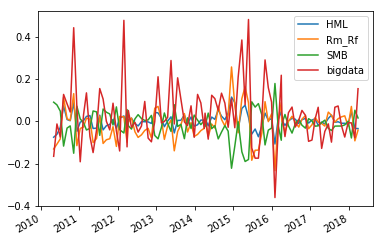

In [34]:
# df_X.describe()
df_X.plot()

In [35]:
X=df_X.values
# np.corrcoef(X,rowvar=False)
X

array([[-3.47860716e-02, -4.21021248e-02,  1.53946719e-02,
         1.53648701e-01],
       [-3.37390295e-02, -9.26328790e-02,  5.19801275e-02,
        -7.78727382e-02],
       [ 4.56467787e-02,  6.98356496e-02, -7.90936921e-02,
        -7.62966960e-03],
       [-1.41936218e-02, -2.33241943e-02, -7.74359147e-05,
        -7.46803954e-03],
       [-9.69824376e-03,  2.55732868e-02, -1.73530023e-02,
        -7.47342040e-02],
       [-9.51340055e-03,  2.07023051e-02, -2.27139332e-02,
        -2.06294264e-02],
       [-2.58050720e-03,  1.17680211e-02, -2.27660054e-02,
         7.20391634e-02],
       [-5.18830273e-03, -4.64361550e-03, -2.30800031e-02,
         6.60585329e-02],
       [ 2.88971018e-02,  2.81985407e-02, -4.36135607e-02,
        -9.87458529e-02],
       [ 1.32327103e-02,  4.30875313e-02, -3.36772170e-02,
        -1.24503036e-02],
       [-1.24536987e-02, -2.31962888e-02,  5.13869603e-03,
        -4.83338040e-02],
       [-4.07021523e-03, -1.09793952e-02, -6.44451271e-03,
      

In [36]:
#get_stocks_r 计算某个数组的股票的收益率Series
#index_date 为观察的数据周期中的日期
#stocks 为要计算的股票数组
#return_data 为总的回报率数据
#df_market_cap 为总的市值数据
def get_stocks_r(index_date,stocks,return_data,df_market_cap):
    s_r = pd.Series(index = index_date)
#     median_size,lmark,hmark=get_div_point(index_date,df_market_cap,btm)
    for date in index_date:
        total_return=0.0
        total_cap=0.0
        for stk in stocks:
            stock_date_cap=df_market_cap[stk][date]
            stock_date_return=return_data[stk][date]*stock_date_cap
            total_cap=total_cap+stock_date_cap
            total_return=total_return+stock_date_return

        s_r[date] = (total_return)/total_cap#每日回报率＝每日总回报/总市值
    return s_r

In [37]:
def get_y(s_y,Rf):
    y = np.array(s_y - Rf)
#     print(y)
    y=y[:data_count-1]
    YT = y.T
    return YT
# y=get_y(return_data_ydyl,Rf)

In [38]:
# str(concept('一带一路'))
arr_ydyl=['000022.XSHE', '000042.XSHE', '000065.XSHE', '000088.XSHE', '000090.XSHE', '000151.XSHE', '000157.XSHE', '000159.XSHE', '000400.XSHE', '000425.XSHE', '000498.XSHE', '000507.XSHE', '000528.XSHE', '000564.XSHE', '000582.XSHE', '000610.XSHE', '000617.XSHE', '000672.XSHE', '000680.XSHE', '000703.XSHE', '000777.XSHE', '000797.XSHE', '000852.XSHE', '000862.XSHE', '000877.XSHE', '000905.XSHE', '000928.XSHE', '000939.XSHE', '000978.XSHE', '600026.XSHG', '600028.XSHG', '600031.XSHG', '600068.XSHG', '600089.XSHG', '600105.XSHG', '600118.XSHG', '600125.XSHG', '600150.XSHG', '600170.XSHG', '600176.XSHG', '600179.XSHG', '600190.XSHG', '600202.XSHG', '600256.XSHG', '600279.XSHG', '600312.XSHG', '600317.XSHG', '600320.XSHG', '600339.XSHG', '600350.XSHG', '600368.XSHG', '600406.XSHG', '600425.XSHG', '600428.XSHG', '600449.XSHG', '600477.XSHG', '600487.XSHG', '600495.XSHG', '600509.XSHG', '600522.XSHG', '600528.XSHG', '600540.XSHG', '600580.XSHG', '600581.XSHG', '600583.XSHG', '600706.XSHG', '600717.XSHG', '600720.XSHG', '600778.XSHG', '600798.XSHG', '600801.XSHG', '600820.XSHG', '600888.XSHG', '600984.XSHG', '002040.XSHE', '600970.XSHG', '002047.XSHE', '002051.XSHE', '600017.XSHG', '600018.XSHG', '601872.XSHG', '601008.XSHG', '002135.XSHE', '601919.XSHG', '002146.XSHE', '601808.XSHG', '601857.XSHG', '601390.XSHG', '601866.XSHG', '002205.XSHE', '002207.XSHE', '601186.XSHG', '601668.XSHG', '002266.XSHE', '601766.XSHG', '601727.XSHG', '601989.XSHG', '002302.XSHE', '002307.XSHE', '002309.XSHE', '601618.XSHG', '601117.XSHG', '300011.XSHE', '002323.XSHE', '002353.XSHE', '601179.XSHG', '601106.XSHG', '002459.XSHE', '300090.XSHE', '300103.XSHE', '601018.XSHG', '002475.XSHE', '601028.XSHG', '002554.XSHE', '002738.XSHE', '601880.XSHG', '002524.XSHE', '300183.XSHE', '601789.XSHG', '300208.XSHE', '300262.XSHE', '601669.XSHG', '601800.XSHG', '603333.XSHG', '603308.XSHG', '300351.XSHE', '603111.XSHG', '600023.XSHG', '300523.XSHE', '300374.XSHE', '603969.XSHG', '603569.XSHG', '603338.XSHG', '603018.XSHG', '603169.XSHG', '002828.XSHE', '603036.XSHG', '603298.XSHG', '603966.XSHG', '603218.XSHG', '601228.XSHG', '600326.XSHG', '603588.XSHG', '603619.XSHG', '600219.XSHG', '300065.XSHE', '002742.XSHE', '600415.XSHG', '603871.XSHG', '300732.XSHE', '600338.XSHG', '600010.XSHG', '600039.XSHG', '601899.XSHG', '002800.XSHE', '601500.XSHG', '300589.XSHE']
if(data_type=="net"):
    arr_ydyl=concept('一带一路')
print('len(arr_ydyl)',len(arr_ydyl))

len(arr_ydyl) 157


In [39]:
# return_data_ydyl=None
# if(data_mode=="fast"):
#     return_data_ydyl=pd.read_csv("return_data_ydyl.csv",index_col=0)
#     return_data_ydyl=trans_index(return_data_ydyl)
# else:
# #     return_data_ydyl=get_return_data(index_date,arr_ydyl,df_price_data)
#     return_data_ydyl=get_stocks_r(index_date,arr_ydyl,return_data,df_market_cap)
return_data_ydyl=get_stocks_r(index_date,arr_ydyl,return_data,df_market_cap)
# return_data_ydyl.to_csv("return_data_ydyl.csv")
return_data_ydyl

2018-03-30   -0.028949
2018-02-28   -0.104921
2018-01-26    0.103772
2017-12-26   -0.019805
2017-11-24   -0.004320
2017-10-24    0.011195
2017-09-22   -0.003050
2017-08-22   -0.000913
2017-07-21    0.055499
2017-06-21    0.014318
2017-05-19   -0.054953
2017-04-19    0.032637
2017-03-17   -0.013705
2017-02-17    0.035753
2017-01-17    0.043298
2016-12-16    0.001903
2016-11-16    0.077130
2016-10-14    0.026541
2016-09-14    0.006522
2016-08-12    0.000897
2016-07-12    0.043105
2016-06-08   -0.006054
2016-05-06   -0.065076
2016-04-06    0.012142
2016-04-01    0.103728
2016-03-01    0.019193
2016-02-01   -0.223980
2015-12-31   -0.007369
2015-11-30   -0.030457
2015-10-30    0.098003
                ...   
2012-09-14   -0.007217
2012-08-14   -0.000178
2012-07-13   -0.055355
2012-06-13   -0.025102
2012-05-11    0.018046
2012-04-11    0.016584
2012-03-30   -0.072500
2012-02-29    0.041254
2012-01-20    0.063403
2011-12-20   -0.063282
2011-11-18    0.008638
2011-10-18   -0.021284
2011-09-16 

In [40]:
YT=get_y(return_data_ydyl,Rf)
X = sm.add_constant(X)
mod = regression.linear_model.OLS(YT, X).fit()
p = mod.params
print(p)
mod.summary()

[-0.02182542  0.45955068  0.11117669 -0.95858356 -0.10946981]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           2.02e-42
Time:                        22:25:26   Log-Likelihood:                 211.14
No. Observations:                  95   AIC:                            -412.3
Df Residuals:                      90   BIC:                            -399.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0218      0.006     -3.676      0.000      -0.034      -0.010
x1             0.4596      0.241      1.908      0.060      -0.019       0.938
x2             0.1112      0.164      0.677      0.500      -0.215       0.438
x3            -0.9586      0.225     -4.263      0.000      -1.405      -0.512
x4            -0.1095      0.029     -3.716      0.000      -0.168      -0.051
==============================================================================
Omnibus:                       22.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.321
Skew:                           0.819   Prob(JB):                     1.60e-12
Kurtosis:                       6.323   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#np.corrcoef(X)
# np.seterr(divide='ignore', invalid='ignore')
# np.corrcoef(X,rowvar=False)#终于调用成功了，原因时前面的X = sm.add_constant(X)改变了X，已经不是一个简单的3维数组啦，是4列了，而去第一列的数据是：1.00000000e+00所以报错了。
X
# np.corrcoef??

array([[ 1.00000000e+00, -3.47860716e-02, -4.21021248e-02,
         1.53946719e-02,  1.53648701e-01],
       [ 1.00000000e+00, -3.37390295e-02, -9.26328790e-02,
         5.19801275e-02, -7.78727382e-02],
       [ 1.00000000e+00,  4.56467787e-02,  6.98356496e-02,
        -7.90936921e-02, -7.62966960e-03],
       [ 1.00000000e+00, -1.41936218e-02, -2.33241943e-02,
        -7.74359147e-05, -7.46803954e-03],
       [ 1.00000000e+00, -9.69824376e-03,  2.55732868e-02,
        -1.73530023e-02, -7.47342040e-02],
       [ 1.00000000e+00, -9.51340055e-03,  2.07023051e-02,
        -2.27139332e-02, -2.06294264e-02],
       [ 1.00000000e+00, -2.58050720e-03,  1.17680211e-02,
        -2.27660054e-02,  7.20391634e-02],
       [ 1.00000000e+00, -5.18830273e-03, -4.64361550e-03,
        -2.30800031e-02,  6.60585329e-02],
       [ 1.00000000e+00,  2.88971018e-02,  2.81985407e-02,
        -4.36135607e-02, -9.87458529e-02],
       [ 1.00000000e+00,  1.32327103e-02,  4.30875313e-02,
        -3.36772170e-02

In [42]:
# df_bigdata_origin=pd.read_csv("bigdata.csv",encoding="gbk",index_col=0)
# df_bigdata_origin
# df_bigdata=pd.Series(df_bigdata_origin["收盘点位"],index=df_bigdata_origin.index,name="bigdata")
# # df_bigdata["close"]=df_bigdata_origin["收盘点位"]
# df_bigdata.index.name="index_date"
# df_bigdata.to_csv("bigdata_close.csv")
# df_bigdata=trans_index(df_bigdata)
# df_bigdata2=df_bigdata[df_bigdata.index.isin(index_date)]
# df_bigdata2.to_csv("bigdata_pure.csv")
# df_bigdata=pd.read_csv("bigdata_pure.csv",index_col=0,header=None)
# df_bigdata["test"]=df_bigdata_origin["收盘点位"]
# df_bigdata

In [43]:
price_data=get_price_cs(data_starttime,data_endtime)
price_data

,603186.XSHG,000062.XSHE,300643.XSHE,600315.XSHG,300146.XSHE,000990.XSHE,300631.XSHE,300363.XSHE,600551.XSHG,603656.XSHG,...,601857.XSHG,000825.XSHE,000543.XSHE,002917.XSHE,000569.XSHE,000732.XSHE,600696.XSHG,603288.XSHG,002725.XSHE,002246.XSHE
2010-04-02,NaN,9.6163,NaN,18.0081,NaN,14.8820,NaN,NaN,15.5627,NaN,...,10.5334,7.7195,4.9641,NaN,NaN,1.9866,7.22,NaN,NaN,11.6093
2010-04-06,NaN,9.5244,NaN,18.5700,NaN,15.1620,NaN,NaN,15.2372,NaN,...,10.5334,7.6462,5.0109,NaN,NaN,1.9866,7.17,NaN,NaN,11.7370
2010-04-07,NaN,9.4234,NaN,18.5747,NaN,15.5483,NaN,NaN,15.3205,NaN,...,10.4766,7.8111,4.9589,NaN,NaN,1.9866,7.22,NaN,NaN,11.9540
2010-04-08,NaN,9.4693,NaN,19.1133,NaN,15.6449,NaN,NaN,15.8049,NaN,...,10.3548,7.5913,4.8860,NaN,NaN,1.9866,7.13,NaN,NaN,11.7498
2010-04-09,NaN,9.6347,NaN,19.2201,NaN,15.7801,NaN,NaN,15.8503,NaN,...,10.3954,7.6462,4.9173,NaN,NaN,1.9866,7.15,NaN,NaN,12.1774
2010-04-12,NaN,9.7724,NaN,19.9120,NaN,16.1567,NaN,NaN,16.4786,NaN,...,10.3548,7.4173,4.8444,NaN,NaN,1.9866,7.00,NaN,NaN,12.1774
2010-04-13,NaN,9.4785,NaN,20.1860,NaN,15.6932,NaN,NaN,16.4862,NaN,...,10.5902,7.4997,4.7612,NaN,NaN,1.9866,6.87,NaN,NaN,11.9795
2010-04-14,NaN,10.4245,NaN,19.8335,NaN,15.7608,NaN,NaN,17.1674,NaN,...,10.5253,7.5089,4.7872,NaN,NaN,1.9866,6.94,NaN,NaN,11.8455
2010-04-15,NaN,10.1857,NaN,19.4014,NaN,15.9153,NaN,NaN,16.7662,NaN,...,10.7363,7.4081,4.7351,NaN,NaN,1.9866,6.77,NaN,NaN,11.6349
2010-04-16,NaN,9.9561,NaN,20.1074,NaN,16.6106,NaN,NaN,16.4634,NaN,...,10.5821,7.3440,4.7039,NaN,NaN,1.9866,6.71,NaN,NaN,11.7306


In [44]:
len(price_data.columns)

3631

In [45]:
len(stocks)

3513

In [46]:
# price_data[stocks]
# price_data[not ]
# price_data[]
# np.all(np.any(price_data,axis=1))#==true
# price_data[1940:].groupby("603186.XSHG").size()#np.nan不参与计算，所以无法得出np.nan的个数
# ss=price_data["603186.XSHG"]
# type(ss[0])#np.nan!=NaN,  type(NaN)==numpy.float64
# ss[np.isnan(ss)]

In [47]:
price_data.dropna(axis=1,how='all') 

,603186.XSHG,000062.XSHE,300643.XSHE,600315.XSHG,300146.XSHE,000990.XSHE,300631.XSHE,300363.XSHE,600551.XSHG,603656.XSHG,...,600091.XSHG,601857.XSHG,000825.XSHE,000543.XSHE,002917.XSHE,000732.XSHE,600696.XSHG,603288.XSHG,002725.XSHE,002246.XSHE
2010-04-02,NaN,9.6163,NaN,18.0081,NaN,14.8820,NaN,NaN,15.5627,NaN,...,8.17,10.5334,7.7195,4.9641,NaN,1.9866,7.22,NaN,NaN,11.6093
2010-04-06,NaN,9.5244,NaN,18.5700,NaN,15.1620,NaN,NaN,15.2372,NaN,...,8.28,10.5334,7.6462,5.0109,NaN,1.9866,7.17,NaN,NaN,11.7370
2010-04-07,NaN,9.4234,NaN,18.5747,NaN,15.5483,NaN,NaN,15.3205,NaN,...,8.23,10.4766,7.8111,4.9589,NaN,1.9866,7.22,NaN,NaN,11.9540
2010-04-08,NaN,9.4693,NaN,19.1133,NaN,15.6449,NaN,NaN,15.8049,NaN,...,8.14,10.3548,7.5913,4.8860,NaN,1.9866,7.13,NaN,NaN,11.7498
2010-04-09,NaN,9.6347,NaN,19.2201,NaN,15.7801,NaN,NaN,15.8503,NaN,...,8.13,10.3954,7.6462,4.9173,NaN,1.9866,7.15,NaN,NaN,12.1774
2010-04-12,NaN,9.7724,NaN,19.9120,NaN,16.1567,NaN,NaN,16.4786,NaN,...,8.06,10.3548,7.4173,4.8444,NaN,1.9866,7.00,NaN,NaN,12.1774
2010-04-13,NaN,9.4785,NaN,20.1860,NaN,15.6932,NaN,NaN,16.4862,NaN,...,7.97,10.5902,7.4997,4.7612,NaN,1.9866,6.87,NaN,NaN,11.9795
2010-04-14,NaN,10.4245,NaN,19.8335,NaN,15.7608,NaN,NaN,17.1674,NaN,...,8.01,10.5253,7.5089,4.7872,NaN,1.9866,6.94,NaN,NaN,11.8455
2010-04-15,NaN,10.1857,NaN,19.4014,NaN,15.9153,NaN,NaN,16.7662,NaN,...,7.86,10.7363,7.4081,4.7351,NaN,1.9866,6.77,NaN,NaN,11.6349
2010-04-16,NaN,9.9561,NaN,20.1074,NaN,16.6106,NaN,NaN,16.4634,NaN,...,7.86,10.5821,7.3440,4.7039,NaN,1.9866,6.71,NaN,NaN,11.7306


In [51]:
# price_data.apply(lambda x:x)
# np.percentile([1,2,np.nan,4,5],40)
# price_data.dropna(axis=1,how='all') 
price_data.dropna(axis=1,thresh=len(price_data.index)) 

,000062.XSHE,600315.XSHG,000990.XSHE,600551.XSHG,002245.XSHE,300052.XSHE,002128.XSHE,600497.XSHG,000539.XSHE,600597.XSHG,...,000584.XSHE,000026.XSHE,000590.XSHE,600091.XSHG,601857.XSHG,000825.XSHE,000543.XSHE,000732.XSHE,600696.XSHG,002246.XSHE
2010-04-02,9.6163,18.0081,14.8820,15.5627,2.3894,16.0984,18.7791,7.7479,5.3485,9.3565,...,6.6993,9.4302,8.9749,8.17,10.5334,7.7195,4.9641,1.9866,7.22,11.6093
2010-04-06,9.5244,18.5700,15.1620,15.2372,2.4055,16.2781,18.8146,7.7812,5.3075,9.6219,...,7.0041,9.3771,9.8679,8.28,10.5334,7.6462,5.0109,1.9866,7.17,11.7370
2010-04-07,9.4234,18.5747,15.5483,15.3205,2.4945,16.8433,18.5230,7.7080,5.3280,9.6219,...,6.9614,9.4236,9.8679,8.23,10.4766,7.8111,4.9589,1.9866,7.22,11.9540
2010-04-08,9.4693,19.1133,15.6449,15.8049,2.7439,15.8701,18.2883,7.6115,5.2938,9.7776,...,6.9492,9.5565,9.1959,8.14,10.3548,7.5913,4.8860,1.9866,7.13,11.7498
2010-04-09,9.6347,19.2201,15.7801,15.8503,2.7877,16.3567,18.5941,7.7646,5.2938,10.0889,...,7.1687,9.5432,9.0544,8.13,10.3954,7.6462,4.9173,1.9866,7.15,12.1774
2010-04-12,9.7724,19.9120,16.1567,16.4786,2.8489,16.4690,18.4305,7.7779,5.4100,10.0248,...,7.3637,10.3473,9.1075,8.06,10.3548,7.4173,4.8444,1.9866,7.00,12.1774
2010-04-13,9.4785,20.1860,15.6932,16.4862,2.6622,14.8595,18.4305,7.9309,5.4851,9.8600,...,7.1260,10.6265,8.8334,7.97,10.5902,7.4997,4.7612,1.9866,6.87,11.9795
2010-04-14,10.4245,19.8335,15.7608,17.1674,2.7672,14.5938,18.4163,8.1438,5.5261,9.8417,...,7.2967,10.5401,8.9395,8.01,10.5253,7.5089,4.7872,1.9866,6.94,11.8455
2010-04-15,10.1857,19.4014,15.9153,16.7662,2.8592,14.0361,18.7293,8.0107,5.4510,10.2536,...,7.2662,10.2676,8.6654,7.86,10.7363,7.4081,4.7351,1.9866,6.77,11.6349
2010-04-16,9.9561,20.1074,16.6106,16.4634,2.8664,14.5601,18.2171,7.9109,5.4646,10.1529,...,7.1077,10.2609,8.8511,7.86,10.5821,7.3440,4.7039,1.9866,6.71,11.7306


In [61]:
thresh=round(len(price_data.columns)*0.4)
price_data.dropna(axis=0,thresh=thresh)

,603186.XSHG,000062.XSHE,300643.XSHE,600315.XSHG,300146.XSHE,000990.XSHE,300631.XSHE,300363.XSHE,600551.XSHG,603656.XSHG,...,601857.XSHG,000825.XSHE,000543.XSHE,002917.XSHE,000569.XSHE,000732.XSHE,600696.XSHG,603288.XSHG,002725.XSHE,002246.XSHE
2010-04-02,NaN,9.6163,NaN,18.0081,NaN,14.8820,NaN,NaN,15.5627,NaN,...,10.5334,7.7195,4.9641,NaN,NaN,1.9866,7.22,NaN,NaN,11.6093
2010-04-06,NaN,9.5244,NaN,18.5700,NaN,15.1620,NaN,NaN,15.2372,NaN,...,10.5334,7.6462,5.0109,NaN,NaN,1.9866,7.17,NaN,NaN,11.7370
2010-04-07,NaN,9.4234,NaN,18.5747,NaN,15.5483,NaN,NaN,15.3205,NaN,...,10.4766,7.8111,4.9589,NaN,NaN,1.9866,7.22,NaN,NaN,11.9540
2010-04-08,NaN,9.4693,NaN,19.1133,NaN,15.6449,NaN,NaN,15.8049,NaN,...,10.3548,7.5913,4.8860,NaN,NaN,1.9866,7.13,NaN,NaN,11.7498
2010-04-09,NaN,9.6347,NaN,19.2201,NaN,15.7801,NaN,NaN,15.8503,NaN,...,10.3954,7.6462,4.9173,NaN,NaN,1.9866,7.15,NaN,NaN,12.1774
2010-04-12,NaN,9.7724,NaN,19.9120,NaN,16.1567,NaN,NaN,16.4786,NaN,...,10.3548,7.4173,4.8444,NaN,NaN,1.9866,7.00,NaN,NaN,12.1774
2010-04-13,NaN,9.4785,NaN,20.1860,NaN,15.6932,NaN,NaN,16.4862,NaN,...,10.5902,7.4997,4.7612,NaN,NaN,1.9866,6.87,NaN,NaN,11.9795
2010-04-14,NaN,10.4245,NaN,19.8335,NaN,15.7608,NaN,NaN,17.1674,NaN,...,10.5253,7.5089,4.7872,NaN,NaN,1.9866,6.94,NaN,NaN,11.8455
2010-04-15,NaN,10.1857,NaN,19.4014,NaN,15.9153,NaN,NaN,16.7662,NaN,...,10.7363,7.4081,4.7351,NaN,NaN,1.9866,6.77,NaN,NaN,11.6349
2010-04-16,NaN,9.9561,NaN,20.1074,NaN,16.6106,NaN,NaN,16.4634,NaN,...,10.5821,7.3440,4.7039,NaN,NaN,1.9866,6.71,NaN,NaN,11.7306


In [56]:
round(len(price_data.columns)*0.3)

1089